In [307]:
import os
import re
import glob
import xlrd 
import numpy as np
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
from scipy.special import erf
from math import pow
import math
import sys
from scipy import special
from scipy.linalg import eig
import matplotlib.ticker as ticker
import scipy.stats as stats
import pylab as pl
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator
plt.style.use('seaborn-white')
from collections import Counter
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


In [308]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rc('axes', linewidth=4)

In [309]:
df = pd.read_excel('Fnt-FDE-data.xlsx')
df.head()

Noofwatermol  Active6nots  Active6s  active6intermediate  \
0             0      183.892   183.729              183.729   
1            10      184.055   183.919              183.946   
2            20      184.110   184.100              184.100   
3            30      184.082   184.055              184.082   
4            40      184.218   184.164              184.218   

   Noactiveintermediate  Noinactivenots  No6inactives  supermolecule  
0               183.130         183.348       183.130        184.273  
1               183.783         183.890       183.674        184.273  
2               183.891         183.920       183.783        184.273  
3               184.000         184.000       183.892        184.273  
4               184.000         184.030       183.892        184.273

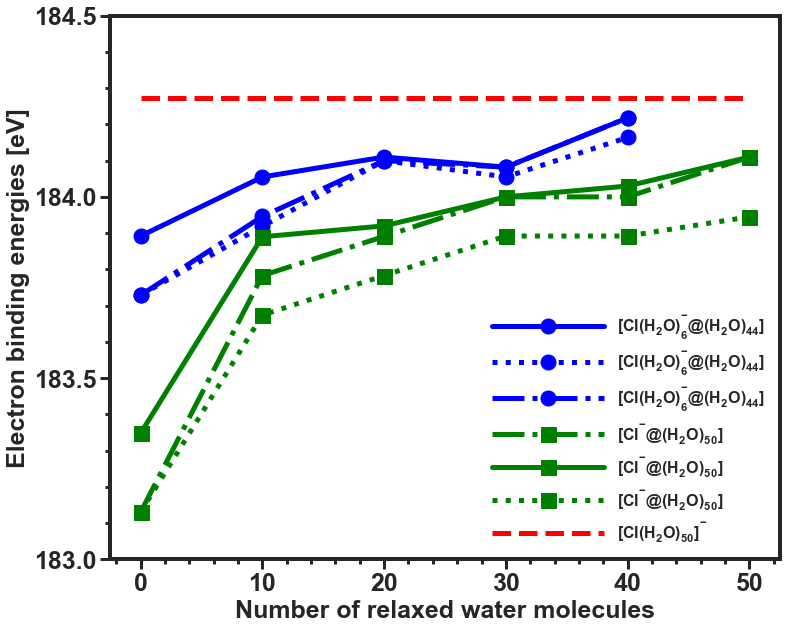

In [310]:
#Influence of the number of relaxed water molecules on the BE for a single snapshot ice at 0 K with saop

Noofwatermol = df.Noofwatermol
Active6nots = df.Active6nots
Active6s = df.Active6s
active6intermediate = df.active6intermediate
Noactiveintermediate = df.Noactiveintermediate
Noinactivenots = df.Noinactivenots
No6inactives = df.No6inactives
supermolecule = df.supermolecule


plt.figure(figsize=(12,10))


plt.plot(Noofwatermol, Active6nots, color="blue", marker='o', markersize=15, linestyle='solid',label='[Cl(H$_{2}$O)$^{-}_{6}$@(H$_{2}$O)$_{44}$]', linewidth=5)
plt.plot(Noofwatermol, Active6s, color="blue", marker='o', markersize=15, linestyle='dotted',label='[Cl(H$_{2}$O)$^{-}_{6}$@(H$_{2}$O)$_{44}$]', linewidth=5)
plt.plot(Noofwatermol, active6intermediate, color="blue", marker='o', markersize=15, linestyle='-.',label='[Cl(H$_{2}$O)$^{-}_{6}$@(H$_{2}$O)$_{44}$]', linewidth=5)
plt.plot(Noofwatermol, Noactiveintermediate, color="green", marker='s', markersize=15, linestyle='-.',label='[Cl$^{-}$@(H$_{2}$O)$_{50}$]',linewidth=5)
plt.plot(Noofwatermol, Noinactivenots, color="green", marker='s', markersize=15, linestyle='solid',label='[Cl$^{-}$@(H$_{2}$O)$_{50}$]', linewidth=5)
plt.plot(Noofwatermol, No6inactives, color="green", marker='s', markersize=15, linestyle='dotted',label='[Cl$^{-}$@(H$_{2}$O)$_{50}$]', linewidth=5)
plt.plot(Noofwatermol, supermolecule, color="red", linestyle='--',label='[Cl(H$_{2}$O)$_{50}$]$^{-}$', linewidth=5)

plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)

plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.legend(loc=4, prop={'size': 16}, handlelength=7)
plt.yticks(np.arange(183.0, 184.6, 0.5))
plt.xlabel('Number of relaxed water molecules', fontsize=25, fontweight='bold')
plt.ylabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
#plt.savefig('Fnt-Fde.png', bbox_inches='tight', dpi=400)
plt.show()
plt.close()

In [311]:
df = pd.read_excel('DIFFERENT_WATER_CLUSTER-SIZES.xlsx', skiprows=7, sheet_name = 'HCl_Cl_longrange_h2om')
df.head()

noofwater  Unnamed: 1  z_Hchloride_1s  Unnamed: 3  z_Hchloride_2s  \
0          0  104.135248     2833.624231   10.313239      280.633536   
1          8  104.140920     2833.778566   10.319423      280.801830   
2         50  104.141645     2833.798301   10.320231      280.823801   
3        100  104.141952     2833.806645   10.320553      280.832555   
4        150  104.133705     2833.582233   10.312296      280.607894   

   Unnamed: 5  z_Hchloride_2p12  Unnamed: 7  z_Hchloride_2p32  z_Hchloride_2p  \
0    7.717027        209.988026    7.658632        208.399030      209.193528   
1    7.723287        210.158353    7.664821        208.567433      209.362893   
2    7.724113        210.180852    7.665627        208.589383      209.385118   
3    7.724438        210.189686    7.665950        208.598169      209.393927   
4    7.716179        209.964955    7.657693        208.373488      209.169221   

   ...  z_chloride_1s  Unnamed: 15  z_chloride_2s  Unnamed: 17  \
0  ...    2823.893712     9.947214     270.673638     7.352389   
1  ...    2824.706927     9.977336     271.493277     7.382478   
2  ...    2824.910284     9.984701     271.693707     7.389852   
3  ...    2825.123112     9.992493     271.905735     7.397646   
4  ...    2824.896112     9.984166     271.679131     7.389318   

   z_chloride_2p12  Unnamed: 19  z_chloride_2p32  z_chloride_2p  \
0       200.065862     7.292550       198.437585     199.251723   
1       200.884615     7.322610       199.255541     200.070078   
2       201.085266     7.329971       199.455834     200.270550   
3       201.297352     7.337764       199.667895     200.482623   
4       201.070738     7.329437       199.441306     200.256022   

   dipole_magnitude  exp_dipole_magnitude  
0            1.0200                  1.08  
1            5.8314                   NaN  
2           14.8869                   NaN  
3           14.8868                   NaN  
4           14.8868                   NaN  

[5 rows x 24 columns]

In [312]:

noofwater = df.noofwater

z_Hchloride_1s = df.z_Hchloride_1s
z_Hchloride_1s = [round(num, 2) for num in z_Hchloride_1s]
z_Hchloride_2s = df.z_Hchloride_2s
z_Hchloride_2s = [round(num, 2) for num in z_Hchloride_2s]
z_Hchloride_2p12 = df.z_Hchloride_2p12
z_Hchloride_2p12 = [round(num, 2) for num in z_Hchloride_2p12]
z_Hchloride_2p32 = df.z_Hchloride_2p32
z_Hchloride_2p32 = [round(num, 2) for num in z_Hchloride_2p32]
z_chloride_1s = df.z_chloride_1s
z_chloride_1s = [round(num, 2) for num in z_chloride_1s]
z_chloride_2s = df.z_chloride_2s
z_chloride_2s = [round(num, 2) for num in z_chloride_2s]
z_chloride_2p12 = df.z_chloride_2p12
z_chloride_2p12 = [round(num, 2) for num in z_chloride_2p12]
z_chloride_2p32 = df.z_chloride_2p32
z_chloride_2p32 = [round(num, 2) for num in z_chloride_2p32]


dipole_magnitude = df.dipole_magnitude
dipole_magnitude = [round(num, 4) for num in dipole_magnitude]

exp_dipole_magnitude = df.exp_dipole_magnitude
exp_dipole_magnitude = [round(num, 2) for num in exp_dipole_magnitude]

In [313]:
df = pd.read_excel('DIFFERENT_WATER_CLUSTER-SIZES.xlsx', skiprows=7, sheet_name = 'HClH2O1_ClH2O1_longrange_h2om')
df.head()

noofwater  Unnamed: 1  o_Hchloride_1s  Unnamed: 3  o_Hchloride_2s  \
0          0  104.143531     2833.849633   10.321360      280.854536   
1          7  104.137931     2833.697246   10.316366      280.718626   
2         49  104.139453     2833.738660   10.317971      280.762321   
3         99  104.139900     2833.750808   10.318431      280.774838   
4        149  104.131816     2833.530850   10.310354      280.555056   

   Unnamed: 5  o_Hchloride_2p12  Unnamed: 7  o_Hchloride_2p32  o_Hchloride_2p  \
0    7.724523        210.191984    7.666526        208.613835      209.402910   
1    7.719557        210.056869    7.661539        208.478132      209.267500   
2    7.721183        210.101115    7.663145        208.521846      209.311481   
3    7.721646        210.113703    7.663605        208.534351      209.324027   
4    7.713583        209.894300    7.655535        208.314766      209.104533   

   ...  o_chloride_1s  Unnamed: 17  o_chloride_2s  Unnamed: 19  \
0  ...    2824.209201     9.958774     270.988212     7.363978   
1  ...    2824.624547     9.974204     271.408056     7.379385   
2  ...    2824.848603     9.982322     271.628958     7.387512   
3  ...    2824.891999     9.983903     271.671985     7.389094   
4  ...    2824.625474     9.974117     271.405694     7.379308   

   o_chloride_2p12  Unnamed: 21  o_chloride_2p32  o_chloride_2p32.1  \
0       200.381218     7.304121       198.752432         199.566825   
1       200.800441     7.319522       199.171511         199.985976   
2       201.021589     7.327634       199.392259         200.206924   
3       201.064644     7.329216       199.435303         200.249973   
4       200.798350     7.319431       199.169032         199.983691   

   o_chloride_2p  Oxygen 1s.1  
0      19.741790   537.193852  
1      19.787121   538.427340  
2      19.803070   538.861328  
3      19.801019   538.805532  
4      19.786363   538.406716  

[5 rows x 26 columns]

In [314]:
o_Hchloride_1s = df.o_Hchloride_1s
o_Hchloride_1s = [round(num, 2) for num in o_Hchloride_1s]
o_Hchloride_2s = df.o_Hchloride_2s
o_Hchloride_2s = [round(num, 2) for num in o_Hchloride_2s]
o_Hchloride_2p12 = df.o_Hchloride_2p12
o_Hchloride_2p12 = [round(num, 2) for num in o_Hchloride_2p12]
o_Hchloride_2p32 = df.o_Hchloride_2p32
o_Hchloride_2p32 = [round(num, 2) for num in o_Hchloride_2p32]
o_chloride_1s = df.o_chloride_1s
o_chloride_1s = [round(num, 2) for num in o_chloride_1s]
o_chloride_2s = df.o_chloride_2s
o_chloride_2s = [round(num, 2) for num in o_chloride_2s]
o_chloride_2p12 = df.o_chloride_2p12
o_chloride_2p12 = [round(num, 2) for num in o_chloride_2p12]
o_chloride_2p32 = df.o_chloride_2p32
o_chloride_2p32 = [round(num, 2) for num in o_chloride_2p32]

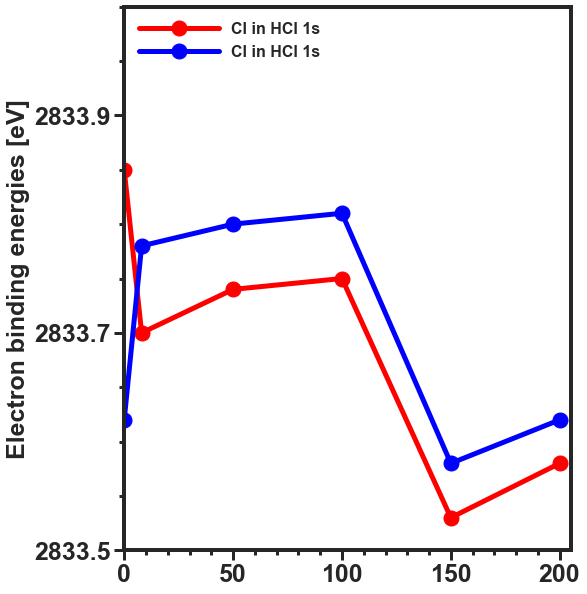

In [315]:

fig, ax = plt.subplots(figsize=(8,10))




plt.plot(noofwater, o_Hchloride_1s, 'r', noofwater, z_Hchloride_1s, 'b',  marker='o', markersize=15, linestyle='solid', linewidth=5,label='Cl in HCl 1s')

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
plt.ylabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
#plt.xlabel('Number of water molecules', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 16}, handlelength=5)
plt.axis([ 0, 205, 2833.5, 2834.0])
plt.xticks(np.arange(0, 205, 50))
plt.yticks(np.arange(2833.5, 2834.0, 0.2))
#plt.savefig('clusters_hcl_acv3z_x2cmmf_gaunt_1s.png', bbox_inches='tight', dpi=400)

plt.show()

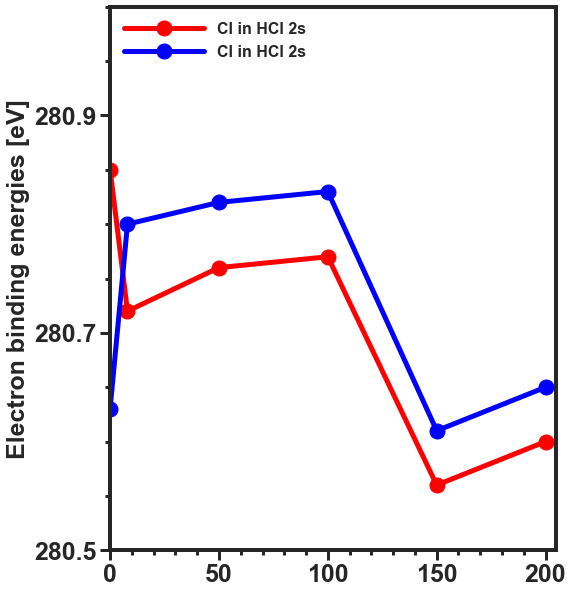

In [316]:
fig, ax = plt.subplots(figsize=(8,10))

plt.plot(noofwater, o_Hchloride_2s, 'r', noofwater, z_Hchloride_2s, 'b',  marker='o', markersize=15, linestyle='solid', linewidth=5,label='Cl in HCl 2s')

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
plt.ylabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
#plt.xlabel('Number of water molecules', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 16}, handlelength=5)
plt.axis([ 0, 205, 280.5, 281.0])
plt.xticks(np.arange(0, 205, 50))
plt.yticks(np.arange(280.5, 281.0, 0.2))
#plt.savefig('clusters_hcl_acv3z_x2cmmf_gaunt_2s.png', bbox_inches='tight', dpi=400)

plt.show()

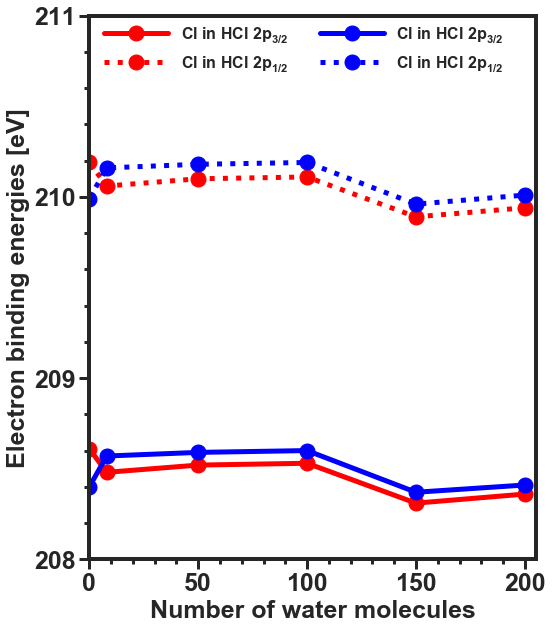

In [317]:
fig, ax = plt.subplots(figsize=(8,10))


plt.plot(noofwater, o_Hchloride_2p32, 'r',  marker='o', markersize=15, linestyle='solid', linewidth=5, label='Cl in HCl 2p$_{3/2}$')
plt.plot(noofwater, o_Hchloride_2p12, 'r',  marker='o', markersize=15, linestyle='dotted', linewidth=5, label='Cl in HCl 2p$_{1/2}$')


plt.plot(noofwater, z_Hchloride_2p32, 'b',  marker='o', markersize=15 , linestyle='solid', linewidth=5,label='Cl in HCl 2p$_{3/2}$')
plt.plot(noofwater, z_Hchloride_2p12, 'b',  marker='o', markersize=15 , linestyle='dotted', linewidth=5,label='Cl in HCl 2p$_{1/2}$')



ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.ylabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.xlabel('Number of water molecules', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 16}, handlelength=4, ncol=2, bbox_to_anchor=(0,1.01))
plt.axis([ 0, 205, 208.0, 211.0])
plt.xticks(np.arange(0, 205, 50))
plt.yticks(np.arange(208.0, 211.2, 1))
#plt.savefig('clusters_hcl_acv3z_x2cmmf_gaunt_2p1232.png', bbox_inches='tight', dpi=400)

plt.show()

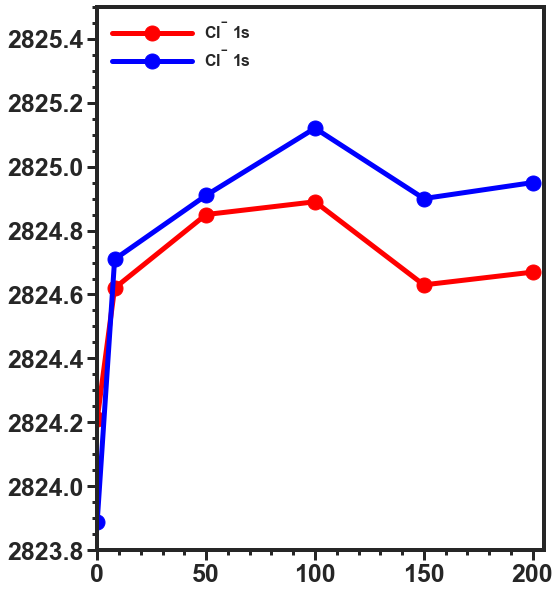

In [318]:
fig, ax = plt.subplots(figsize=(8,10))




plt.plot(noofwater, o_chloride_1s, 'r', noofwater, z_chloride_1s, 'b',  marker='o', markersize=15, linestyle='solid', linewidth=5,label='Cl$^{-}$ 1s')

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
#plt.ylabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
#plt.xlabel('Number of water molecules', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 16}, handlelength=5)
plt.axis([ 0, 205, 2823.8, 2825.5])
plt.xticks(np.arange(0, 205, 50))
plt.yticks(np.arange(2823.8, 2825.5, 0.2))
#plt.savefig('clusters_cl_acv3z_x2cmmf_gaunt_1s.png', bbox_inches='tight', dpi=400)

plt.show()

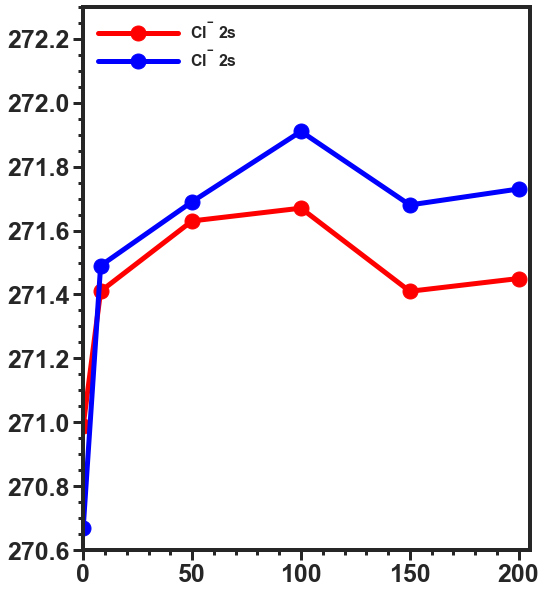

In [319]:
fig, ax = plt.subplots(figsize=(8,10))

plt.plot(noofwater, o_chloride_2s, 'r', noofwater, z_chloride_2s, 'b',  marker='o', markersize=15, linestyle='solid', linewidth=5,label='Cl$^{-}$ 2s')

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
#plt.ylabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
#plt.xlabel('Number of water molecules', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 16}, handlelength=5)
plt.axis([ 0, 205, 270.6, 272.3])
plt.xticks(np.arange(0, 205, 50))
plt.yticks(np.arange(270.6, 272.3, 0.2))
#plt.savefig('clusters_cl_acv3z_x2cmmf_gaunt_2s.png', bbox_inches='tight', dpi=400)

plt.show()

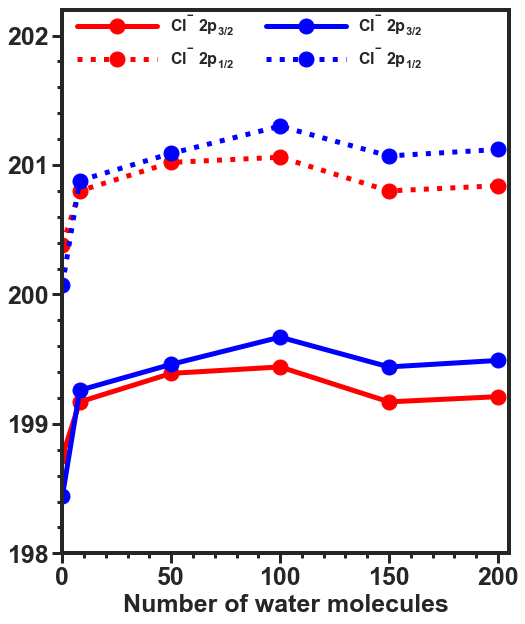

In [320]:
fig, ax = plt.subplots(figsize=(8,10))


plt.plot(noofwater, o_chloride_2p32, 'r',  marker='o', markersize=15, linestyle='solid', linewidth=5, label='Cl$^{-}$ 2p$_{3/2}$')
plt.plot(noofwater, o_chloride_2p12, 'r',  marker='o', markersize=15, linestyle='dotted', linewidth=5, label='Cl$^{-}$ 2p$_{1/2}$')


plt.plot(noofwater, z_chloride_2p32, 'b',  marker='o', markersize=15 , linestyle='solid', linewidth=5,label='Cl$^{-}$ 2p$_{3/2}$')
plt.plot(noofwater, z_chloride_2p12, 'b',  marker='o', markersize=15 , linestyle='dotted', linewidth=5,label='Cl$^{-}$ 2p$_{1/2}$')



ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
#plt.ylabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.xlabel('Number of water molecules', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 16}, handlelength=5, ncol=2, bbox_to_anchor=(0,1.02))
#plt.xticks(np.arange(0, 205, 50))
#plt.yticks(np.arange(198.25, 203.25, 1))

plt.axis([ 0, 205, 198, 202.2])
plt.xticks(np.arange(0, 205, 50))
plt.yticks(np.arange(198, 202.2, 1))
#plt.savefig('clusters_cl_acv3z_x2cmmf_gaunt_2p1232.png', bbox_inches='tight', dpi=400)

plt.show()

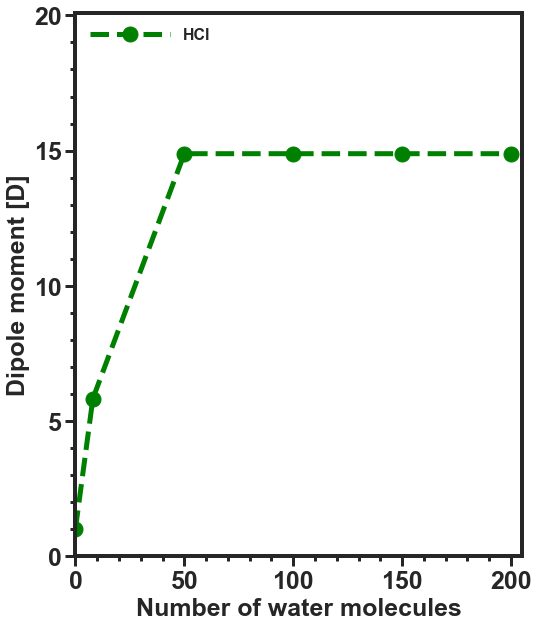

In [321]:
fig, ax = plt.subplots(figsize=(8,10))




plt.plot(noofwater, dipole_magnitude, 'green',  marker='o', markersize=15, linestyle='dashed', linewidth=5, label='HCl')


ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
plt.ylabel('Dipole moment [D]', fontsize=25, fontweight='bold')
plt.xlabel('Number of water molecules', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 16}, handlelength=5)
plt.axis([ 0, 205, 0, 20.1])
plt.xticks(np.arange(0, 205, 50))
plt.yticks(np.arange(0, 20.1, 5))
#plt.savefig('Dipole_magnitude.png', bbox_inches='tight', dpi=400)

plt.show()

In [322]:
df = pd.read_excel('cl_0_1_6_water_added_in_ice_saop.xlsx', skiprows=3)
df.head()

cl_1s_saop_0water_in_active  cl_2s_saop_0water_in_active  \
0                  2754.052521                   243.511239   
1                  2755.331438                   244.790156   
2                  2754.515108                   243.946615   
3                  2755.086539                   244.518046   
4                  2755.603548                   245.035055   

   cl_2p_saop_0water_in_active  cl_1s_saop_1water_in_active  \
0                   182.803498                  2754.025310   
1                   184.096021                  2754.079732   
2                   183.252479                  2754.379053   
3                   183.837516                  2754.460686   
4                   184.368131                  2754.542319   

   cl_2s_saop_1water_in_active  cl_2p_saop_1water_in_active  \
0                   243.484028                   182.789893   
1                   244.817367                   183.483773   
2                   244.001037                   183.198058   
3                   244.681312                   183.592617   
4                   244.980633                   183.796699   

   cl_1s_saop_6water_in_active  cl_2s_saop_6water_in_active  \
0                  2754.079732                   243.538450   
1                  2755.331438                   244.762945   
2                  2754.732796                   244.164303   
3                  2755.304227                   244.762945   
4                  2755.657970                   245.116688   

   cl_2p_saop_6water_in_active  
0                   182.844314  
1                   184.082415  
2                   183.483773  
3                   184.068809  
4                   184.422552

mean_0water = 183.66608670000002
mean_1water = 183.696290916
mean_6water = 183.783094
std_0water = 0.4842640688417024
std_1water = 0.35116046159333864
std_6waters = 0.455294595113053


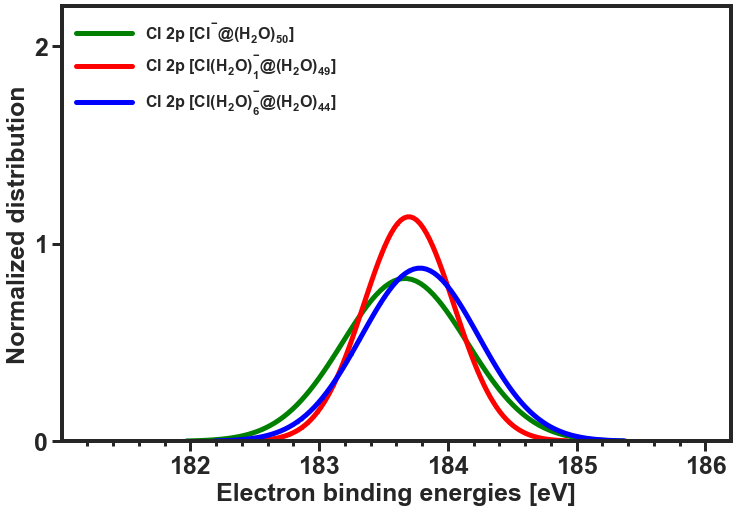

In [323]:
#Comparison between 0,1 and 6 water added to the activesystem and interacting with 50, 49, and 44 water molecules

cl_2p_saop_0water_in_active = df.cl_2p_saop_0water_in_active
cl_2p_saop_1water_in_active = df.cl_2p_saop_1water_in_active
cl_2p_saop_6water_in_active = df.cl_2p_saop_6water_in_active



zero_water_in_active_cl_2p = np.array(cl_2p_saop_0water_in_active)
one_water_in_active_cl_2p  = np.array(cl_2p_saop_1water_in_active)
six_water_in_active_cl_2p  = np.array(cl_2p_saop_6water_in_active)


mean_zero_water_in_active_cl_2p = np.mean(zero_water_in_active_cl_2p)
print("mean_0water =", mean_zero_water_in_active_cl_2p)
mean_one_water_in_active_cl_2p = np.mean(one_water_in_active_cl_2p)
print("mean_1water =", mean_one_water_in_active_cl_2p )
mean_six_water_in_active_cl_2p  = np.mean(six_water_in_active_cl_2p)
print("mean_6water =", mean_six_water_in_active_cl_2p )


std_zero_water_in_active_cl_2p = np.std(zero_water_in_active_cl_2p)
print("std_0water =", std_zero_water_in_active_cl_2p)
std_one_water_in_active_cl_2p  = np.std(one_water_in_active_cl_2p)
print("std_1water =", std_one_water_in_active_cl_2p)
std_six_water_in_active_cl_2p  = np.std(six_water_in_active_cl_2p )
print("std_6waters =", std_six_water_in_active_cl_2p)


zero_water_in_active_cl_2p_BE = np.linspace(mean_zero_water_in_active_cl_2p - 3.5*std_zero_water_in_active_cl_2p , mean_zero_water_in_active_cl_2p + 3.5*std_zero_water_in_active_cl_2p, 100)
one_water_in_active_cl_2p_BE = np.linspace(mean_one_water_in_active_cl_2p - 3.5*std_one_water_in_active_cl_2p, mean_one_water_in_active_cl_2p + 3.5*std_one_water_in_active_cl_2p, 100)
six_water_in_active_cl_2p_BE =  np.linspace(mean_six_water_in_active_cl_2p - 3.5*std_six_water_in_active_cl_2p, mean_six_water_in_active_cl_2p + 3.5*std_six_water_in_active_cl_2p, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)


plt.plot(zero_water_in_active_cl_2p_BE, scipy.stats.norm.pdf(zero_water_in_active_cl_2p_BE, mean_zero_water_in_active_cl_2p, std_zero_water_in_active_cl_2p), color="green", marker='>', markersize=2, linestyle='solid',label='Cl 2p [Cl$^{-}$@(H$_{2}$O)$_{50}$]', linewidth=5)
plt.plot(one_water_in_active_cl_2p_BE, scipy.stats.norm.pdf(one_water_in_active_cl_2p_BE, mean_one_water_in_active_cl_2p, std_one_water_in_active_cl_2p),  color="red", marker='x', markersize=2, linestyle='solid',label='Cl 2p [Cl(H$_{2}$O)$^{-}_{1}$@(H$_{2}$O)$_{49}$]', linewidth=5)
plt.plot(six_water_in_active_cl_2p_BE, scipy.stats.norm.pdf(six_water_in_active_cl_2p_BE, mean_six_water_in_active_cl_2p, std_six_water_in_active_cl_2p), color="blue", marker='d', markersize=2, linestyle='solid',label='Cl 2p [Cl(H$_{2}$O)$^{-}_{6}$@(H$_{2}$O)$_{44}$]', linewidth=5)

plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)

plt.axis([181, 186.2, 0, 2.2])
plt.yticks(np.arange(0, 2.2, 1))
plt.xticks(np.arange(182, 186.2, 1))
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 16}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
#plt.gca().axes.get_yaxis().set_visible(False)
plt.ylabel('Normalized distribution', fontsize=25, fontweight='bold')

#plt.savefig('cl50_0_1_6_saop-2p.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()

In [324]:
df = pd.read_excel('HCl_Cl-_adsorbed_on_ice_210K_data.xlsx', skiprows=7, sheet_name = 'HCl_Cl-_on_ice_X2cmmf+gaunt')
df.head()

Unnamed: 0  z_Hchloride_1s  Unnamed: 2  z_Hchloride_2s  Unnamed: 4  \
0  104.145056     2833.891122   10.318187      280.768175    7.721440   
1  104.148317     2833.979862   10.321073      280.846705    7.724323   
2  104.145398     2833.900411   10.320777      280.838662    7.723753   
3  104.148559     2833.986441   10.320647      280.835132    7.723710   
4  104.152555     2834.095186   10.320758      280.838158    7.723560   

   z_Hchloride_2p12  Unnamed: 6  z_Hchloride_2p32  z_Hchloride_2p  Unnamed: 9  \
0        210.108113    7.663424        208.529418      209.318766         NaN   
1        210.186560    7.665852        208.595491      209.391025         NaN   
2        210.171048    7.665348        208.581778      209.376413         NaN   
3        210.169863    7.665298        208.580420      209.375142         NaN   
4        210.165787    7.665353        208.581914      209.373851         NaN   

   ...  Unnamed: 11  Unnamed: 12  z_chloride_1s  Unnamed: 14  z_chloride_2s  \
0  ...          NaN   103.974386    2829.247011    10.140970     275.945936   
1  ...          NaN   103.959494    2828.841779    10.127521     275.579982   
2  ...          NaN   103.971449    2829.167092    10.139618     275.909141   
3  ...          NaN   103.803116    2824.586587     9.976992     271.483942   
4  ...          NaN   103.970378    2829.137963    10.138144     275.869028   

   Unnamed: 16  z_chloride_2p12  Unnamed: 18  z_chloride_2p32  z_chloride_2p  
0     7.544894       205.304114     7.485096       203.676947     204.490531  
1     7.531355       204.935714     7.471656       203.311219     204.123467  
2     7.543436       205.264447     7.483518       203.634016     204.449231  
3     7.380296       200.825243     7.320276       199.192022     200.008633  
4     7.542000       205.225362     7.482046       203.593958     204.409660  

[5 rows x 21 columns]

{2833.89: 1, 2833.98: 2, 2833.9: 1, 2833.99: 1, 2834.1: 1, 2833.92: 2, 2833.94: 3, 2833.96: 1, 2833.93: 2, 2834.05: 2, 2833.95: 1, 2834.0: 1, 2834.29: 1, 2834.01: 3, 2834.2: 1, 2833.85: 1, 2833.97: 1}
mean_z = 2833.9884
std_z = 0.09379466935812684


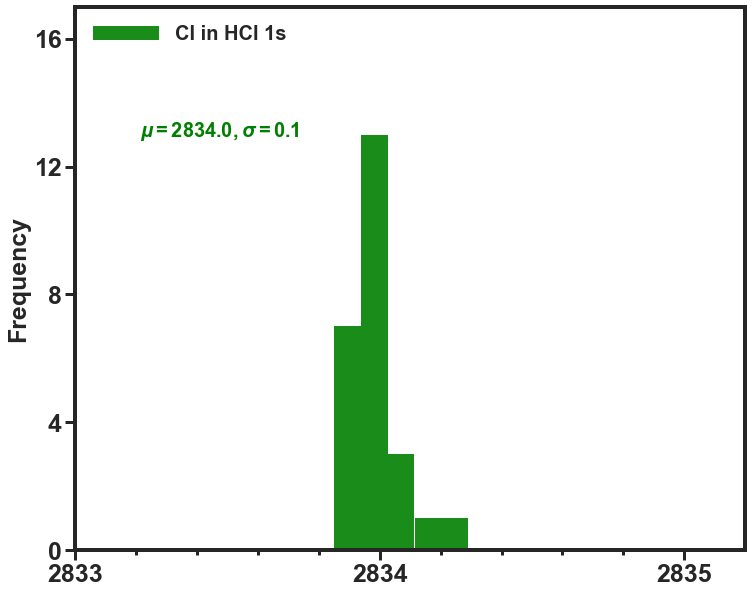

In [325]:
fig, ax = plt.subplots(figsize=(12,10))

x_hcl_acv3z_x2cmmf_gaunt_1s = df.z_Hchloride_1s

y_hcl_acv3z_x2cmmf_gaunt_1s = [round(num, 2) for num in x_hcl_acv3z_x2cmmf_gaunt_1s]

z_hcl_acv3z_x2cmmf_gaunt_1s = np.array(y_hcl_acv3z_x2cmmf_gaunt_1s)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_hcl_acv3z_x2cmmf_gaunt_1s = count(z_hcl_acv3z_x2cmmf_gaunt_1s)
print(counted_hcl_acv3z_x2cmmf_gaunt_1s)



mean_z_hcl_acv3z_x2cmmf_gaunt_1s = np.mean(z_hcl_acv3z_x2cmmf_gaunt_1s)
print("mean_z =", mean_z_hcl_acv3z_x2cmmf_gaunt_1s)


std_z_hcl_acv3z_x2cmmf_gaunt_1s = np.std(z_hcl_acv3z_x2cmmf_gaunt_1s)
print("std_z =", std_z_hcl_acv3z_x2cmmf_gaunt_1s)






kwargs = dict(alpha=0.9, bins=5)

dk_hcl_acv3z_x2cmmf_gaunt_1s = list(dict.keys(counted_hcl_acv3z_x2cmmf_gaunt_1s))
dv_hcl_acv3z_x2cmmf_gaunt_1s = list(dict.values(counted_hcl_acv3z_x2cmmf_gaunt_1s))


dkmin_z_hcl_acv3z_x2cmmf_gaunt_1s = min(dk_hcl_acv3z_x2cmmf_gaunt_1s)
dkmax_z_hcl_acv3z_x2cmmf_gaunt_1s = max(dk_hcl_acv3z_x2cmmf_gaunt_1s)



dvmin_z_hcl_acv3z_x2cmmf_gaunt_1s = min(dv_hcl_acv3z_x2cmmf_gaunt_1s)
dvmax_z_hcl_acv3z_x2cmmf_gaunt_1s = max(dv_hcl_acv3z_x2cmmf_gaunt_1s)


ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
#plt.yticks(np.arange(0, 30, 2))
#plt.xticks(np.arange(2833.8, 2834.55, 0.08))

plt.axis([2833, 2835.2, 0, 17])
plt.yticks(np.arange(0, 17, 4))
plt.xticks(np.arange(2833, 2835.2, 1))

plt.hist(z_hcl_acv3z_x2cmmf_gaunt_1s, **kwargs, color='green', rwidth=0.99, label='Cl in HCl 1s', linewidth=0.2)
#sns.distplot(z_hcl_acv3z_x2cmmf_gaunt_1s , color='green', hist=False, kde_kws = {'color':'green', 'linewidth':2, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
#plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.3)
plt.figtext(0.2, 0.7, "$\mu=2834.0, \sigma=0.1$", fontsize=20, color="green")
#plt.savefig('zero_hcl_acv3z_x2cmmf_gaunt_1s.png', bbox_inches='tight', dpi=400)

plt.show()


{280.77: 1, 280.85: 4, 280.84: 5, 280.83: 3, 280.86: 3, 280.87: 5, 280.89: 1, 280.82: 1, 280.79: 1, 280.72: 1}
mean_z = 280.8404
std_z = 0.035268115912250625


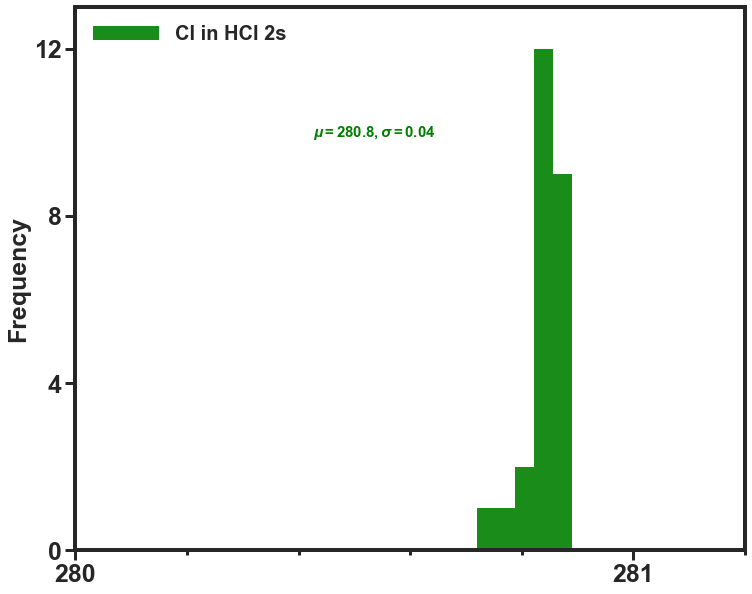

In [326]:
x_hcl_acv3z_x2cmmf_gaunt_2s = df.z_Hchloride_2s

y_hcl_acv3z_x2cmmf_gaunt_2s = [round(num, 2) for num in x_hcl_acv3z_x2cmmf_gaunt_2s]

z_hcl_acv3z_x2cmmf_gaunt_2s = np.array(y_hcl_acv3z_x2cmmf_gaunt_2s)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_hcl_acv3z_x2cmmf_gaunt_2s = count(z_hcl_acv3z_x2cmmf_gaunt_2s)
print(counted_hcl_acv3z_x2cmmf_gaunt_2s)



mean_z_hcl_acv3z_x2cmmf_gaunt_2s = np.mean(z_hcl_acv3z_x2cmmf_gaunt_2s)
print("mean_z =", mean_z_hcl_acv3z_x2cmmf_gaunt_2s)


std_z_hcl_acv3z_x2cmmf_gaunt_2s = np.std(z_hcl_acv3z_x2cmmf_gaunt_2s)
print("std_z =", std_z_hcl_acv3z_x2cmmf_gaunt_2s)



plt.figure(figsize=(12,10))



kwargs = dict(alpha=0.9, bins=5)

dk_hcl_acv3z_x2cmmf_gaunt_2s = list(dict.keys(counted_hcl_acv3z_x2cmmf_gaunt_2s))
dv_hcl_acv3z_x2cmmf_gaunt_2s = list(dict.values(counted_hcl_acv3z_x2cmmf_gaunt_2s))


dkmin_z_hcl_acv3z_x2cmmf_gaunt_2s = min(dk_hcl_acv3z_x2cmmf_gaunt_2s)
dkmax_z_hcl_acv3z_x2cmmf_gaunt_2s = max(dk_hcl_acv3z_x2cmmf_gaunt_2s)



dvmin_z_hcl_acv3z_x2cmmf_gaunt_2s = min(dv_hcl_acv3z_x2cmmf_gaunt_2s)
dvmax_z_hcl_acv3z_x2cmmf_gaunt_2s = max(dv_hcl_acv3z_x2cmmf_gaunt_2s)




plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
#plt.yticks(np.arange(0, 13, 2))
#plt.xticks(np.arange(280.00, 282.04, 0.08))

plt.axis([280, 281.2, 0, 13])
plt.yticks(np.arange(0, 13, 4))
plt.xticks(np.arange(280, 281.2, 1))

plt.hist(z_hcl_acv3z_x2cmmf_gaunt_2s, **kwargs, color='green', rwidth=0.98, label='Cl in HCl 2s', linewidth=0.2)
#sns.distplot(z_hcl_acv3z_x2cmmf_gaunt_2s , color='red', hist=False, kde_kws = {'color':'green', 'linewidth':2, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
#plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.3)
plt.figtext(0.4, 0.7, "$\mu=280.8, \sigma=0.04$", fontsize=15, color="green")
#plt.savefig('zero_hcl_acv3z_x2cmmf_gaunt_2s.png', bbox_inches='tight', dpi=400)

plt.show()


{209.32: 1, 209.39: 2, 209.38: 3, 209.37: 6, 209.35: 3, 209.41: 6, 209.4: 2, 209.34: 1, 209.21: 1}
mean_z = 209.37279999999998
std_z = 0.041232996495523574


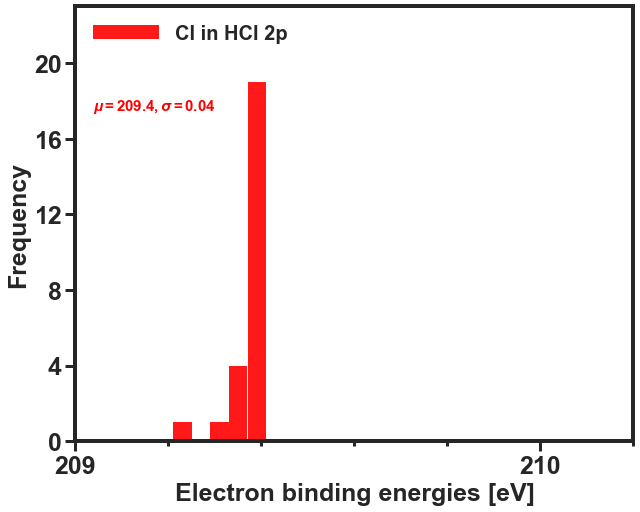

In [327]:
x_hcl_acv3z_x2cmmf_gaunt_2p = df.z_Hchloride_2p

y_hcl_acv3z_x2cmmf_gaunt_2p = [round(num, 2) for num in x_hcl_acv3z_x2cmmf_gaunt_2p]

z_hcl_acv3z_x2cmmf_gaunt_2p = np.array(y_hcl_acv3z_x2cmmf_gaunt_2p)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_hcl_acv3z_x2cmmf_gaunt_2p = count(z_hcl_acv3z_x2cmmf_gaunt_2p)
print(counted_hcl_acv3z_x2cmmf_gaunt_2p)



mean_z_hcl_acv3z_x2cmmf_gaunt_2p = np.mean(z_hcl_acv3z_x2cmmf_gaunt_2p)
print("mean_z =", mean_z_hcl_acv3z_x2cmmf_gaunt_2p)


std_z_hcl_acv3z_x2cmmf_gaunt_2p = np.std(z_hcl_acv3z_x2cmmf_gaunt_2p)
print("std_z =", std_z_hcl_acv3z_x2cmmf_gaunt_2p)



plt.figure(figsize=(10,8))

kwargs = dict(alpha=0.9, bins=5)

dk_hcl_acv3z_x2cmmf_gaunt_2p = list(dict.keys(counted_hcl_acv3z_x2cmmf_gaunt_2p))
dv_hcl_acv3z_x2cmmf_gaunt_2p = list(dict.values(counted_hcl_acv3z_x2cmmf_gaunt_2p))


dkmin_z_hcl_acv3z_x2cmmf_gaunt_2p = min(dk_hcl_acv3z_x2cmmf_gaunt_2p)
dkmax_z_hcl_acv3z_x2cmmf_gaunt_2p = max(dk_hcl_acv3z_x2cmmf_gaunt_2p)



dvmin_z_hcl_acv3z_x2cmmf_gaunt_2p = min(dv_hcl_acv3z_x2cmmf_gaunt_2p)
dvmax_z_hcl_acv3z_x2cmmf_gaunt_2p = max(dv_hcl_acv3z_x2cmmf_gaunt_2p)



plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
#plt.yticks(np.arange(0, 30, 2))
#plt.xticks(np.arange(208.6, 209.6, 0.08))

plt.axis([209, 210.2, 0, 23])
plt.yticks(np.arange(0, 23, 4))
plt.xticks(np.arange(209, 210.2, 1))

plt.hist(z_hcl_acv3z_x2cmmf_gaunt_2p, **kwargs, color='red', rwidth=0.99, label='Cl in HCl 2p', linewidth=0.2)
#sns.distplot(z_hcl_acv3z_x2cmmf_gaunt_2p , color='red', hist=False, kde_kws = {'color':'red', 
#                       'linewidth':2, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.3)
plt.figtext(0.15, 0.7, "$\mu=209.4, \sigma=0.04$", fontsize=15, color="red")
#plt.savefig('zero_hcl_acv3z_x2cmmf_gaunt_2p.png', bbox_inches='tight', dpi=400)

plt.show()


{208.53: 2, 208.6: 3, 208.58: 5, 208.57: 2, 208.52: 1, 208.51: 1, 208.61: 6, 208.62: 1, 208.55: 1, 208.54: 1, 208.37: 1, 208.59: 1}
mean = 208.57039999999998
std = 0.0514960192636306
{210.11: 1, 210.19: 6, 210.17: 5, 210.16: 2, 210.2: 6, 210.21: 1, 210.14: 1, 210.13: 1, 210.05: 1, 210.18: 1}
mean = 210.1732
std = 0.03460866943411371


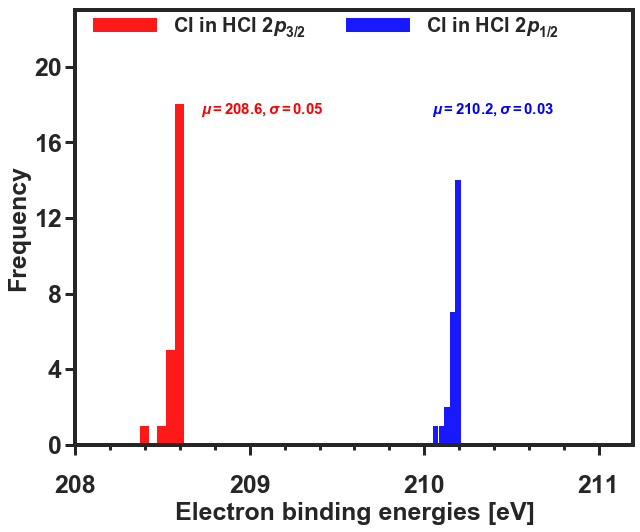

In [328]:
x_hcl_acv3z_x2cmmf_gaunt_2p32 = df.z_Hchloride_2p32
x_hcl_acv3z_x2cmmf_gaunt_2p12 = df.z_Hchloride_2p12

#spa_x_hcl_acv3z_x2cmmf_gaunt_2p12 = np.array(x_hcl_acv3z_x2cmmf_gaunt_2p12)


#x_hcl_acv3z_x2cmmf_gaunt_2p12 = [] 

#for i in spa_x_hcl_acv3z_x2cmmf_gaunt_2p12:
#    i-=1.44
#    x_hcl_acv3z_x2cmmf_gaunt_2p12.append(i)
#print("Adjust to plot spin-orbit graph=", x_hcl_acv3z_x2cmmf_gaunt_2p12)


y_hcl_acv3z_x2cmmf_gaunt_2p32 = [round(num, 2) for num in x_hcl_acv3z_x2cmmf_gaunt_2p32]

z_hcl_acv3z_x2cmmf_gaunt_2p32 = np.array(y_hcl_acv3z_x2cmmf_gaunt_2p32)



y_hcl_acv3z_x2cmmf_gaunt_2p12 = [round(num, 2) for num in x_hcl_acv3z_x2cmmf_gaunt_2p12]

z_hcl_acv3z_x2cmmf_gaunt_2p12 = np.array(y_hcl_acv3z_x2cmmf_gaunt_2p12)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_hcl_acv3z_x2cmmf_gaunt_2p32 = count(z_hcl_acv3z_x2cmmf_gaunt_2p32)
print(counted_hcl_acv3z_x2cmmf_gaunt_2p32)

mean_z_hcl_acv3z_x2cmmf_gaunt_2p32 = np.mean(z_hcl_acv3z_x2cmmf_gaunt_2p32)
print("mean =", mean_z_hcl_acv3z_x2cmmf_gaunt_2p32)


std_z_hcl_acv3z_x2cmmf_gaunt_2p32 = np.std(z_hcl_acv3z_x2cmmf_gaunt_2p32)
print("std =", std_z_hcl_acv3z_x2cmmf_gaunt_2p32)


def count(list_z1) -> dict:
    hist = {}
    for i in list_z1:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_hcl_acv3z_x2cmmf_gaunt_2p12 = count(z_hcl_acv3z_x2cmmf_gaunt_2p12)
print(counted_hcl_acv3z_x2cmmf_gaunt_2p12)


mean_z_hcl_acv3z_x2cmmf_gaunt_2p12 = np.mean(z_hcl_acv3z_x2cmmf_gaunt_2p12)
print("mean =", mean_z_hcl_acv3z_x2cmmf_gaunt_2p12)


std_z_hcl_acv3z_x2cmmf_gaunt_2p12 = np.std(z_hcl_acv3z_x2cmmf_gaunt_2p12)
print("std =", std_z_hcl_acv3z_x2cmmf_gaunt_2p12)



plt.figure(figsize=(10,8))

kwargs = dict(alpha=0.9, bins=5)

dk_hcl_acv3z_x2cmmf_gaunt_2p32 = list(dict.keys(counted_hcl_acv3z_x2cmmf_gaunt_2p32))
dv_hcl_acv3z_x2cmmf_gaunt_2p32 = list(dict.values(counted_hcl_acv3z_x2cmmf_gaunt_2p32))


dk_hcl_acv3z_x2cmmf_gaunt_2p12 = list(dict.keys(counted_hcl_acv3z_x2cmmf_gaunt_2p12))
dv_hcl_acv3z_x2cmmf_gaunt_2p12 = list(dict.values(counted_hcl_acv3z_x2cmmf_gaunt_2p12))



dkmin_z_hcl_acv3z_x2cmmf_gaunt_2p32 = min(dk_hcl_acv3z_x2cmmf_gaunt_2p32)
dkmax_z_hcl_acv3z_x2cmmf_gaunt_2p32 = max(dk_hcl_acv3z_x2cmmf_gaunt_2p32)
dvmin_z_hcl_acv3z_x2cmmf_gaunt_2p32 = min(dv_hcl_acv3z_x2cmmf_gaunt_2p32)
dvmax_z_hcl_acv3z_x2cmmf_gaunt_2p32 = max(dv_hcl_acv3z_x2cmmf_gaunt_2p32)

dkmin_z_hcl_acv3z_x2cmmf_gaunt_2p12 = min(dk_hcl_acv3z_x2cmmf_gaunt_2p12)
dkmax_z_hcl_acv3z_x2cmmf_gaunt_2p12 = max(dk_hcl_acv3z_x2cmmf_gaunt_2p12)
dvmin_z_hcl_acv3z_x2cmmf_gaunt_2p12 = min(dv_hcl_acv3z_x2cmmf_gaunt_2p12)
dvmax_z_hcl_acv3z_x2cmmf_gaunt_2p12 = max(dv_hcl_acv3z_x2cmmf_gaunt_2p12)




plt.minorticks_on()
plt.tick_params(axis='y', which='major', length=10, width=3)
plt.tick_params(axis='x', which='major', length=10, width=3, pad=20)
plt.tick_params(axis='x', which='minor', length=5, width=3)


plt.axis([208, 211.2, 0, 23])
plt.yticks(np.arange(0, 23, 4))
plt.xticks(np.arange(208, 211.2, 1))


plt.hist(z_hcl_acv3z_x2cmmf_gaunt_2p32, **kwargs, color='red', rwidth=0.99, label='Cl in HCl 2$p_{3/2}$', linewidth=0.2)
plt.hist(z_hcl_acv3z_x2cmmf_gaunt_2p12, **kwargs, color='blue', rwidth=0.99, label='Cl in HCl 2$p_{1/2}$', linewidth=0.2)
#sns.distplot(z_hcl_acv3z_x2cmmf_gaunt_2p32 , color='red', hist=False, kde_kws = {'color':'red', 
#                       'linewidth':2, 'linestyle':'--', 'alpha':0.9})
#sns.distplot(z_hcl_acv3z_x2cmmf_gaunt_2p12, color='blue', hist=False, kde_kws = {'color':'blue', 
#                      'linewidth':2, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.2, ncol=2, bbox_to_anchor=(0,1.03))
plt.figtext(0.3, 0.7, "$\mu=208.6, \sigma=0.05$", fontsize=15, color="red")
plt.figtext(0.62, 0.7, "$\mu=210.2, \sigma=0.03$", fontsize=15, color="blue")
#plt.savefig('zero_hcl_acv3z_x2cmmf_gaunt_2p1232.png', bbox_inches='tight', dpi=400)
#plt.gca().axes.xaxis.set_ticklabels([])


plt.show()



In [329]:
##Cl- adsorbed on ice, zero water molecule added to the Cl

{2829.2: 2, 2828.8: 1, 2824.6: 1, 2829.1: 2, 2827.7: 1, 2832.6: 1, 2822.7: 1, 2828.6: 2, 2828.0: 1, 2826.4: 1, 2827.9: 1, 2828.4: 1, 2838.9: 1, 2823.4: 1, 2824.9: 1, 2826.8: 1, 2827.0: 2, 2829.5: 1, 2827.8: 1, 2828.9: 1, 2829.0: 1}
mean_z = 2828.164
std_z = 3.0115617211008687


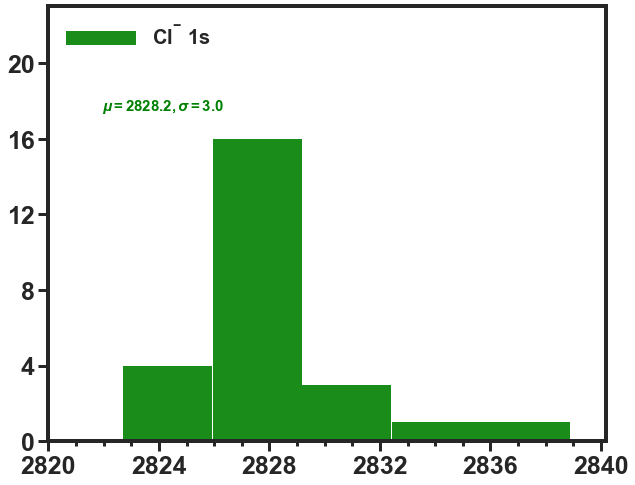

In [330]:
x_cl_acv3z_x2cmmf_gaunt_1s = df.z_chloride_1s
y_cl_acv3z_x2cmmf_gaunt_1s = [round(num, 1) for num in x_cl_acv3z_x2cmmf_gaunt_1s]

z_cl_acv3z_x2cmmf_gaunt_1s = np.array(y_cl_acv3z_x2cmmf_gaunt_1s)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_cl_acv3z_x2cmmf_gaunt_1s = count(z_cl_acv3z_x2cmmf_gaunt_1s)
print(counted_cl_acv3z_x2cmmf_gaunt_1s)



mean_z_cl_acv3z_x2cmmf_gaunt_1s = np.mean(z_cl_acv3z_x2cmmf_gaunt_1s)
print("mean_z =", mean_z_cl_acv3z_x2cmmf_gaunt_1s)


std_z_cl_acv3z_x2cmmf_gaunt_1s = np.std(z_cl_acv3z_x2cmmf_gaunt_1s)
print("std_z =", std_z_cl_acv3z_x2cmmf_gaunt_1s)



plt.figure(figsize=(10,8))



kwargs = dict(alpha=0.9, bins=5)

dk_cl_acv3z_x2cmmf_gaunt_1s = list(dict.keys(counted_cl_acv3z_x2cmmf_gaunt_1s))
dv_cl_acv3z_x2cmmf_gaunt_1s = list(dict.values(counted_cl_acv3z_x2cmmf_gaunt_1s))


dkmin_z_cl_acv3z_x2cmmf_gaunt_1s = min(dk_cl_acv3z_x2cmmf_gaunt_1s)
dkmax_z_cl_acv3z_x2cmmf_gaunt_1s = max(dk_cl_acv3z_x2cmmf_gaunt_1s)



dvmin_z_cl_acv3z_x2cmmf_gaunt_1s = min(dv_cl_acv3z_x2cmmf_gaunt_1s)
dvmax_z_cl_acv3z_x2cmmf_gaunt_1s = max(dv_cl_acv3z_x2cmmf_gaunt_1s)





plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
#plt.yticks(np.arange(0, 20.2, 2))
#plt.xticks(np.arange(2822, 2842.2, 4))

plt.axis([2820, 2840.2, 0, 23])
plt.yticks(np.arange(0, 23, 4))
plt.xticks(np.arange(2820, 2840.2, 4))

plt.hist(z_cl_acv3z_x2cmmf_gaunt_1s, **kwargs, color='green', rwidth=0.99, label='Cl$^{-}$ 1s', linewidth=0.1)
#sns.distplot(z_cl_acv3z_x2cmmf_gaunt_1s , color='red', hist=False, kde_kws = {'color':'green', 'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
#plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
#plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.figtext(0.2, 0.7, "$\mu=2828.2, \sigma=3.0$", fontsize=15, color="green")
#plt.savefig('zero_cl_acv3z_x2cmmf_gaunt_1s.png', bbox_inches='tight', dpi=400)

plt.show()


{275.9: 3, 275.6: 2, 271.5: 1, 274.4: 1, 274.1: 2, 273.9: 1, 275.3: 1, 274.7: 1, 274.0: 1, 274.6: 1, 275.5: 2, 275.0: 1, 273.4: 1, 273.7: 2, 275.8: 1, 276.3: 1, 274.5: 1, 275.4: 1, 275.7: 1}
mean_z = 274.79999999999995
std_z = 1.0695793565696758


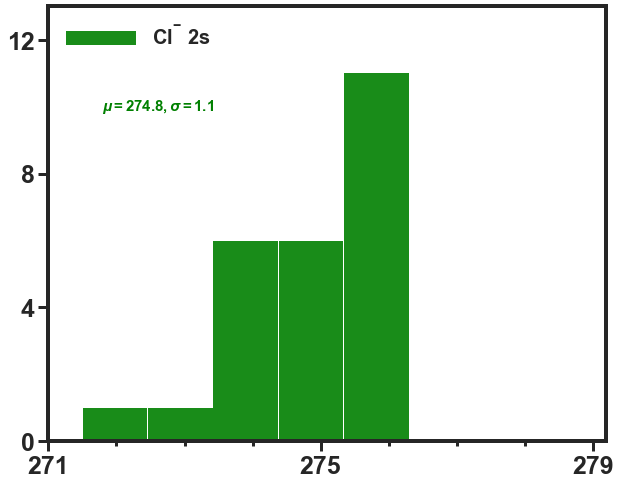

In [331]:
x_cl_acv3z_x2cmmf_gaunt_2s = df.z_chloride_2s

y_cl_acv3z_x2cmmf_gaunt_2s = [round(num, 1) for num in x_cl_acv3z_x2cmmf_gaunt_2s]

z_cl_acv3z_x2cmmf_gaunt_2s = np.array(y_cl_acv3z_x2cmmf_gaunt_2s)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_cl_acv3z_x2cmmf_gaunt_2s = count(z_cl_acv3z_x2cmmf_gaunt_2s)
print(counted_cl_acv3z_x2cmmf_gaunt_2s)



mean_z_cl_acv3z_x2cmmf_gaunt_2s = np.mean(z_cl_acv3z_x2cmmf_gaunt_2s)
print("mean_z =", mean_z_cl_acv3z_x2cmmf_gaunt_2s)


std_z_cl_acv3z_x2cmmf_gaunt_2s = np.std(z_cl_acv3z_x2cmmf_gaunt_2s)
print("std_z =", std_z_cl_acv3z_x2cmmf_gaunt_2s)



plt.figure(figsize=(10,8))

kwargs = dict(alpha=0.9, bins=5)

dk_cl_acv3z_x2cmmf_gaunt_2s = list(dict.keys(counted_cl_acv3z_x2cmmf_gaunt_2s))
dv_cl_acv3z_x2cmmf_gaunt_2s = list(dict.values(counted_cl_acv3z_x2cmmf_gaunt_2s))


dkmin_z_cl_acv3z_x2cmmf_gaunt_2s = min(dk_cl_acv3z_x2cmmf_gaunt_2s)
dkmax_z_cl_acv3z_x2cmmf_gaunt_2s = max(dk_cl_acv3z_x2cmmf_gaunt_2s)



dvmin_z_cl_acv3z_x2cmmf_gaunt_2s = min(dv_cl_acv3z_x2cmmf_gaunt_2s)
dvmax_z_cl_acv3z_x2cmmf_gaunt_2s = max(dv_cl_acv3z_x2cmmf_gaunt_2s)




plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)

plt.axis([271, 279.2, 0, 13])
plt.yticks(np.arange(0, 13, 4))
plt.xticks(np.arange(271, 279.2, 4))


plt.hist(z_cl_acv3z_x2cmmf_gaunt_2s, **kwargs, color='green', rwidth=0.99, label='Cl$^{-}$ 2s', linewidth=0.1)
#sns.distplot(z_cl_acv3z_x2cmmf_gaunt_2s , color='red', hist=False, kde_kws = {'color':'green', 
#                       'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
#plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
#plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.figtext(0.2, 0.7, "$\mu=274.8, \sigma=1.1$", fontsize=15, color="green")
#plt.savefig('zero_cl_acv3z_x2cmmf_gaunt_2s.png', bbox_inches='tight', dpi=400)

plt.show()


{204.5: 1, 204.1: 1, 204.4: 3, 200.0: 1, 202.9: 2, 202.8: 2, 203.9: 2, 203.2: 1, 202.6: 1, 203.1: 3, 204.0: 1, 201.7: 1, 202.0: 1, 202.2: 2, 204.8: 1, 204.2: 1, 204.3: 1}
mean_z = 203.26000000000005
std_z = 1.0943491216243588


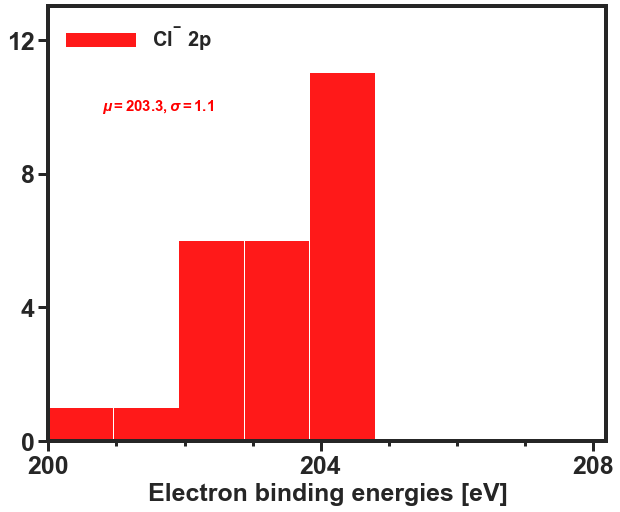

In [332]:
x_cl_acv3z_x2cmmf_gaunt_2p = df.z_chloride_2p

y_cl_acv3z_x2cmmf_gaunt_2p = [round(num, 1) for num in x_cl_acv3z_x2cmmf_gaunt_2p]

z_cl_acv3z_x2cmmf_gaunt_2p = np.array(y_cl_acv3z_x2cmmf_gaunt_2p)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_cl_acv3z_x2cmmf_gaunt_2p = count(z_cl_acv3z_x2cmmf_gaunt_2p)
print(counted_cl_acv3z_x2cmmf_gaunt_2p)



mean_z_cl_acv3z_x2cmmf_gaunt_2p = np.mean(z_cl_acv3z_x2cmmf_gaunt_2p)
print("mean_z =", mean_z_cl_acv3z_x2cmmf_gaunt_2p)


std_z_cl_acv3z_x2cmmf_gaunt_2p = np.std(z_cl_acv3z_x2cmmf_gaunt_2p)
print("std_z =", std_z_cl_acv3z_x2cmmf_gaunt_2p)



plt.figure(figsize=(10,8))

kwargs = dict(alpha=0.9, bins=5)

dk_cl_acv3z_x2cmmf_gaunt_2p = list(dict.keys(counted_cl_acv3z_x2cmmf_gaunt_2p))
dv_cl_acv3z_x2cmmf_gaunt_2p = list(dict.values(counted_cl_acv3z_x2cmmf_gaunt_2p))


dkmin_z_cl_acv3z_x2cmmf_gaunt_2p = min(dk_cl_acv3z_x2cmmf_gaunt_2p)
dkmax_z_cl_acv3z_x2cmmf_gaunt_2p = max(dk_cl_acv3z_x2cmmf_gaunt_2p)



dvmin_z_cl_acv3z_x2cmmf_gaunt_2p = min(dv_cl_acv3z_x2cmmf_gaunt_2p)
dvmax_z_cl_acv3z_x2cmmf_gaunt_2p = max(dv_cl_acv3z_x2cmmf_gaunt_2p)



plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)


plt.axis([200, 208.2, 0, 13])
plt.yticks(np.arange(0, 13, 4))
plt.xticks(np.arange(200, 208.2, 4))

plt.hist(z_cl_acv3z_x2cmmf_gaunt_2p, **kwargs, color='red', rwidth=0.99, label='Cl$^{-}$ 2p', linewidth=0.1)
#sns.distplot(z_cl_acv3z_x2cmmf_gaunt_2p , color='red', hist=False, kde_kws = {'color':'red', 
#                      'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
#plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.figtext(0.2, 0.7, "$\mu=203.3, \sigma=1.1$", fontsize=15, color="red")
#plt.savefig('zero_cl_acv3z_x2cmmf_gaunt_2p.png', bbox_inches='tight', dpi=400)

plt.show()


{203.7: 1, 203.3: 2, 203.6: 3, 199.2: 1, 202.1: 2, 200.3: 1, 201.9: 1, 203.1: 2, 202.4: 1, 201.7: 1, 202.3: 1, 200.8: 1, 201.6: 1, 201.1: 1, 201.4: 2, 204.0: 1, 202.2: 1, 203.4: 2}
mean = 202.34400000000002
std = 1.1933415269737324
{205.3: 3, 204.9: 1, 200.8: 1, 205.2: 2, 203.8: 2, 204.7: 2, 204.0: 2, 203.5: 1, 203.9: 2, 204.8: 1, 202.6: 1, 204.1: 1, 202.9: 1, 203.1: 1, 205.6: 1, 203.0: 1, 205.0: 1, 205.1: 1}
mean = 204.18
std = 1.093983546494186


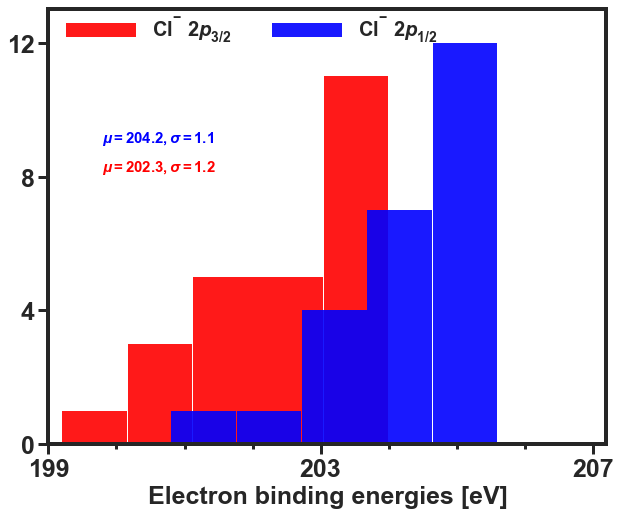

In [333]:
x_cl_acv3z_x2cmmf_gaunt_2p32 = df.z_chloride_2p32
x_cl_acv3z_x2cmmf_gaunt_2p12 = df.z_chloride_2p12



y_cl_acv3z_x2cmmf_gaunt_2p32 = [round(num, 1) for num in x_cl_acv3z_x2cmmf_gaunt_2p32]

z_cl_acv3z_x2cmmf_gaunt_2p32 = np.array(y_cl_acv3z_x2cmmf_gaunt_2p32)



y_cl_acv3z_x2cmmf_gaunt_2p12 = [round(num, 1) for num in x_cl_acv3z_x2cmmf_gaunt_2p12]

z_cl_acv3z_x2cmmf_gaunt_2p12 = np.array(y_cl_acv3z_x2cmmf_gaunt_2p12)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_cl_acv3z_x2cmmf_gaunt_2p32 = count(z_cl_acv3z_x2cmmf_gaunt_2p32)
print(counted_cl_acv3z_x2cmmf_gaunt_2p32)

mean_z_cl_acv3z_x2cmmf_gaunt_2p32 = np.mean(z_cl_acv3z_x2cmmf_gaunt_2p32)
print("mean =", mean_z_cl_acv3z_x2cmmf_gaunt_2p32)


std_z_cl_acv3z_x2cmmf_gaunt_2p32 = np.std(z_cl_acv3z_x2cmmf_gaunt_2p32)
print("std =", std_z_cl_acv3z_x2cmmf_gaunt_2p32)


def count(list_z1) -> dict:
    hist = {}
    for i in list_z1:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_cl_acv3z_x2cmmf_gaunt_2p12 = count(z_cl_acv3z_x2cmmf_gaunt_2p12)
print(counted_cl_acv3z_x2cmmf_gaunt_2p12)


mean_z_cl_acv3z_x2cmmf_gaunt_2p12 = np.mean(z_cl_acv3z_x2cmmf_gaunt_2p12)
print("mean =", mean_z_cl_acv3z_x2cmmf_gaunt_2p12)


std_z_cl_acv3z_x2cmmf_gaunt_2p12 = np.std(z_cl_acv3z_x2cmmf_gaunt_2p12)
print("std =", std_z_cl_acv3z_x2cmmf_gaunt_2p12)



plt.figure(figsize=(10,8))

kwargs = dict(alpha=0.9, bins=5, linewidth=0.2)

dk_cl_acv3z_x2cmmf_gaunt_2p32 = list(dict.keys(counted_cl_acv3z_x2cmmf_gaunt_2p32))
dv_cl_acv3z_x2cmmf_gaunt_2p32 = list(dict.values(counted_cl_acv3z_x2cmmf_gaunt_2p32))


dk_cl_acv3z_x2cmmf_gaunt_2p12 = list(dict.keys(counted_cl_acv3z_x2cmmf_gaunt_2p12))
dv_cl_acv3z_x2cmmf_gaunt_2p12 = list(dict.values(counted_cl_acv3z_x2cmmf_gaunt_2p12))



dkmin_z_cl_acv3z_x2cmmf_gaunt_2p32 = min(dk_cl_acv3z_x2cmmf_gaunt_2p32)
dkmax_z_cl_acv3z_x2cmmf_gaunt_2p32 = max(dk_cl_acv3z_x2cmmf_gaunt_2p32)
dvmin_z_cl_acv3z_x2cmmf_gaunt_2p32 = min(dv_cl_acv3z_x2cmmf_gaunt_2p32)
dvmax_z_cl_acv3z_x2cmmf_gaunt_2p32 = max(dv_cl_acv3z_x2cmmf_gaunt_2p32)

dkmin_z_cl_acv3z_x2cmmf_gaunt_2p12 = min(dk_cl_acv3z_x2cmmf_gaunt_2p12)
dkmax_z_cl_acv3z_x2cmmf_gaunt_2p12 = max(dk_cl_acv3z_x2cmmf_gaunt_2p12)
dvmin_z_cl_acv3z_x2cmmf_gaunt_2p12 = min(dv_cl_acv3z_x2cmmf_gaunt_2p12)
dvmax_z_cl_acv3z_x2cmmf_gaunt_2p12 = max(dv_cl_acv3z_x2cmmf_gaunt_2p12)




plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)


plt.axis([199, 207.2, 0, 13])
plt.yticks(np.arange(0, 13, 4))
plt.xticks(np.arange(199, 207.2, 4))


plt.hist(z_cl_acv3z_x2cmmf_gaunt_2p32, **kwargs, color='red', rwidth=0.99, label='Cl$^{-}$ 2$p_{3/2}$')
plt.hist(z_cl_acv3z_x2cmmf_gaunt_2p12, **kwargs, color='blue', rwidth=0.99, label='Cl$^{-}$ 2$p_{1/2}$')
#sns.distplot(z_cl_acv3z_x2cmmf_gaunt_2p32 , color='red', hist=False, kde_kws = {'color':'red', 
#                       'linewidth':5, 'linestyle':'--', 'alpha':0.9})
#sns.distplot(z_cl_acv3z_x2cmmf_gaunt_2p12, color='blue', hist=False, kde_kws = {'color':'blue', 
#                       'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
#plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5, ncol=2, bbox_to_anchor=(0,1.03))
plt.figtext(0.2, 0.6, "$\mu=202.3, \sigma=1.2$", fontsize=15, color="red")
plt.figtext(0.2, 0.65, "$\mu=204.2, \sigma=1.1$", fontsize=15, color="blue")
#plt.savefig('zero_cl_acv3z_x2cmmf_gaunt_2p1232.png', bbox_inches='tight', dpi=400)

plt.show()



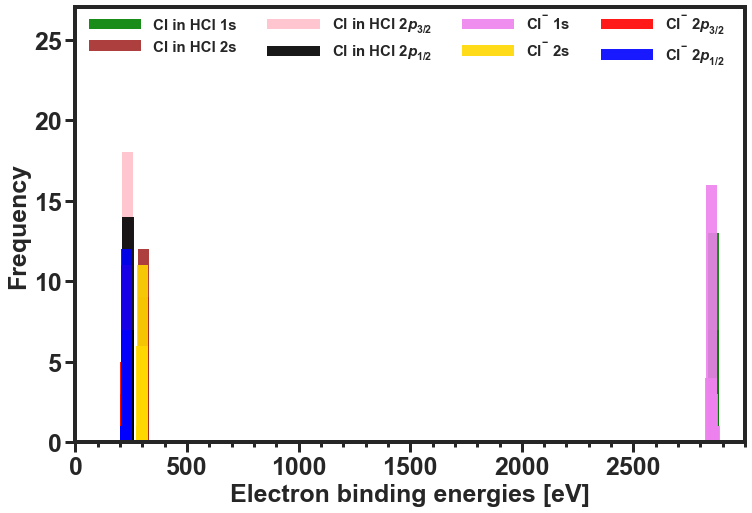

In [334]:
fig, ax = plt.subplots(figsize=(12,8))



kwargs = dict(alpha=0.9, bins=5)


ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)
#ax.set_xscale('log')


plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
plt.axis([0, 3000, 0, 27])
plt.yticks(np.arange(0, 27, 5))
plt.xticks(np.arange(0, 3000, 500))

plt.hist(z_hcl_acv3z_x2cmmf_gaunt_1s, **kwargs, color='green', rwidth=0.98, label='Cl in HCl 1s', width=50)#, linewidth=15)
plt.hist(z_hcl_acv3z_x2cmmf_gaunt_2s, **kwargs, color='brown', rwidth=0.98, label='Cl in HCl 2s', width=50)#, linewidth=15)
plt.hist(z_hcl_acv3z_x2cmmf_gaunt_2p32, **kwargs, color='pink', rwidth=0.98, label='Cl in HCl 2$p_{3/2}$', width=50)#, linewidth=15)
plt.hist(z_hcl_acv3z_x2cmmf_gaunt_2p12, **kwargs, color='black', rwidth=0.98, label='Cl in HCl 2$p_{1/2}$', width=50)#, linewidth=15)

plt.hist(z_cl_acv3z_x2cmmf_gaunt_1s, **kwargs, color='violet', rwidth=0.98, label='Cl$^{-}$ 1s', width=50)#, linewidth=0.1)
plt.hist(z_cl_acv3z_x2cmmf_gaunt_2s, **kwargs, color='gold', rwidth=0.98, label='Cl$^{-}$ 2s', width=50)#, linewidth=0.1)
plt.hist(z_cl_acv3z_x2cmmf_gaunt_2p32, **kwargs, color='red', rwidth=0.98, label='Cl$^{-}$ 2$p_{3/2}$', width=50)
plt.hist(z_cl_acv3z_x2cmmf_gaunt_2p12, **kwargs, color='blue', rwidth=0.98, label='Cl$^{-}$ 2$p_{1/2}$', width=50)
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 15}, handlelength=3.5, ncol=4, bbox_to_anchor=(0,1.02))
#plt.figtext(0.15, 0.7, "$\mu=204.4, \sigma=0.3$", fontsize=15, color="red")
#plt.figtext(0.5, 0.7, "$\mu=206.0, \sigma=0.3$", fontsize=15, color="blue")
###plt.savefig('adsorbed_shift.png', bbox_inches='tight', dpi=400)

plt.show()

In [335]:
df = pd.read_excel('Cl-_solvated_300K_data.xlsx', skiprows=7, sheet_name = 'Cl-_solvated_X2cmmf+gaunt')
df.head()

Unnamed: 0  s_chloride_1s  Unnamed: 2  s_chloride_2s  Unnamed: 4  \
0  103.984735    2829.528631   10.150638     276.209008    7.554627   
1  103.982991    2829.481177   10.149715     276.183891    7.553633   
2  104.005955    2830.106050   10.173142     276.821364    7.577029   
3  103.986711    2829.582386   10.153184     276.278285    7.557126   
4  103.996717    2829.854677   10.163786     276.566769    7.567686   

   s_chloride_2p12  Unnamed: 6  s_chloride_2p32  s_chloride_2p  
0       205.568955    7.494780       203.940461     204.754708  
1       205.541909    7.493764       203.912802     204.727356  
2       206.178533    7.517135       204.548752     205.363642  
3       205.636960    7.497233       204.007214     204.822087  
4       205.924316    7.507833       204.295636     205.109976

{2829.5: 4, 2830.1: 9, 2829.6: 4, 2829.9: 4, 2829.8: 5, 2829.7: 4, 2830.0: 6, 2830.2: 2, 2829.1: 1, 2830.4: 2, 2830.3: 4, 2830.5: 3, 2829.3: 2}
mean_z = 2829.926
std_z = 0.3272980293249639


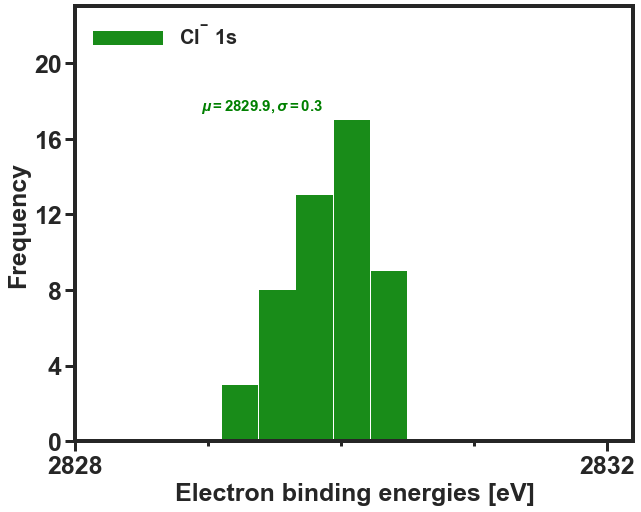

In [336]:
x_cl_acv3z_x2cmmf_gaunt_1s = df.s_chloride_1s
y_cl_acv3z_x2cmmf_gaunt_1s = [round(num, 1) for num in x_cl_acv3z_x2cmmf_gaunt_1s]

z_cl_acv3z_x2cmmf_gaunt_1s = np.array(y_cl_acv3z_x2cmmf_gaunt_1s)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_cl_acv3z_x2cmmf_gaunt_1s = count(z_cl_acv3z_x2cmmf_gaunt_1s)
print(counted_cl_acv3z_x2cmmf_gaunt_1s)



mean_z_cl_acv3z_x2cmmf_gaunt_1s = np.mean(z_cl_acv3z_x2cmmf_gaunt_1s)
print("mean_z =", mean_z_cl_acv3z_x2cmmf_gaunt_1s)


std_z_cl_acv3z_x2cmmf_gaunt_1s = np.std(z_cl_acv3z_x2cmmf_gaunt_1s)
print("std_z =", std_z_cl_acv3z_x2cmmf_gaunt_1s)


fig, ax = plt.subplots(figsize=(10,8))



kwargs = dict(alpha=0.9, bins=5)

dk_cl_acv3z_x2cmmf_gaunt_1s = list(dict.keys(counted_cl_acv3z_x2cmmf_gaunt_1s))
dv_cl_acv3z_x2cmmf_gaunt_1s = list(dict.values(counted_cl_acv3z_x2cmmf_gaunt_1s))


dkmin_z_cl_acv3z_x2cmmf_gaunt_1s = min(dk_cl_acv3z_x2cmmf_gaunt_1s)
dkmax_z_cl_acv3z_x2cmmf_gaunt_1s = max(dk_cl_acv3z_x2cmmf_gaunt_1s)



dvmin_z_cl_acv3z_x2cmmf_gaunt_1s = min(dv_cl_acv3z_x2cmmf_gaunt_1s)
dvmax_z_cl_acv3z_x2cmmf_gaunt_1s = max(dv_cl_acv3z_x2cmmf_gaunt_1s)




ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)

#plt.yticks(np.arange(0, 20.2, 2))
#plt.xticks(np.arange(2829.1, 2830.6, 1))


plt.axis([2828, 2832.2, 0, 23])
plt.yticks(np.arange(0, 23, 4))
plt.xticks(np.arange(2828, 2832.2, 4))


plt.hist(z_cl_acv3z_x2cmmf_gaunt_1s, **kwargs, color='green', rwidth=0.98, label='Cl$^{-}$ 1s', linewidth=0.1)
#sns.distplot(z_cl_acv3z_x2cmmf_gaunt_1s , color='red', hist=False, kde_kws = {'color':'green', 'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.figtext(0.3, 0.7, "$\mu=2829.9, \sigma=0.3$", fontsize=15, color="green")
#plt.savefig('solvate_cl_acv3z_x2cmmf_gaunt_1s.png', bbox_inches='tight', dpi=400)

plt.show()


{276.2: 4, 276.8: 7, 276.3: 4, 276.6: 4, 276.5: 5, 276.4: 4, 276.7: 7, 276.9: 3, 275.8: 1, 277.1: 3, 277.0: 3, 277.2: 2, 276.0: 2, 277.3: 1}
mean_z = 276.63
std_z = 0.33421549934136985


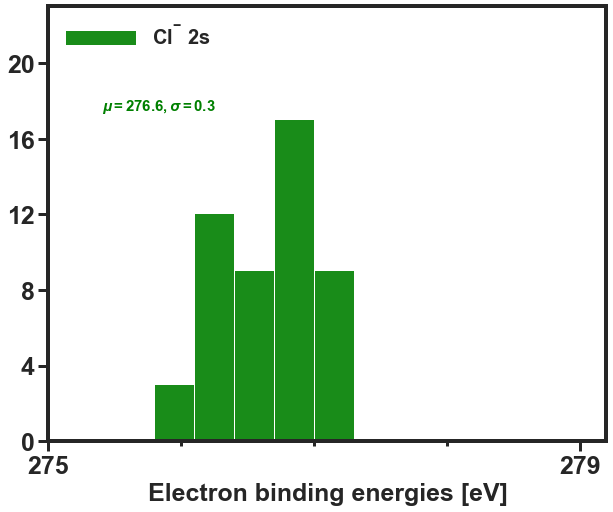

In [337]:
x_cl_acv3z_x2cmmf_gaunt_2s = df.s_chloride_2s

y_cl_acv3z_x2cmmf_gaunt_2s = [round(num, 1) for num in x_cl_acv3z_x2cmmf_gaunt_2s]

z_cl_acv3z_x2cmmf_gaunt_2s = np.array(y_cl_acv3z_x2cmmf_gaunt_2s)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_cl_acv3z_x2cmmf_gaunt_2s = count(z_cl_acv3z_x2cmmf_gaunt_2s)
print(counted_cl_acv3z_x2cmmf_gaunt_2s)



mean_z_cl_acv3z_x2cmmf_gaunt_2s = np.mean(z_cl_acv3z_x2cmmf_gaunt_2s)
print("mean_z =", mean_z_cl_acv3z_x2cmmf_gaunt_2s)


std_z_cl_acv3z_x2cmmf_gaunt_2s = np.std(z_cl_acv3z_x2cmmf_gaunt_2s)
print("std_z =", std_z_cl_acv3z_x2cmmf_gaunt_2s)



plt.figure(figsize=(10,8))

kwargs = dict(alpha=0.9, bins=5)

dk_cl_acv3z_x2cmmf_gaunt_2s = list(dict.keys(counted_cl_acv3z_x2cmmf_gaunt_2s))
dv_cl_acv3z_x2cmmf_gaunt_2s = list(dict.values(counted_cl_acv3z_x2cmmf_gaunt_2s))


dkmin_z_cl_acv3z_x2cmmf_gaunt_2s = min(dk_cl_acv3z_x2cmmf_gaunt_2s)
dkmax_z_cl_acv3z_x2cmmf_gaunt_2s = max(dk_cl_acv3z_x2cmmf_gaunt_2s)



dvmin_z_cl_acv3z_x2cmmf_gaunt_2s = min(dv_cl_acv3z_x2cmmf_gaunt_2s)
dvmax_z_cl_acv3z_x2cmmf_gaunt_2s = max(dv_cl_acv3z_x2cmmf_gaunt_2s)




plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
#plt.yticks(np.arange(0, 20.2, 2))
#plt.xticks(np.arange(275.8, 280.6, 1))

plt.axis([275, 279.2, 0, 23])
plt.yticks(np.arange(0, 23, 4))
plt.xticks(np.arange(275, 279.2, 4))

plt.hist(z_cl_acv3z_x2cmmf_gaunt_2s, **kwargs, color='green', rwidth=0.98, label='Cl$^{-}$ 2s', linewidth=0.2)
#sns.distplot(z_cl_acv3z_x2cmmf_gaunt_2s , color='red', hist=False, kde_kws = {'color':'green', 
#                       'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
#plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.figtext(0.2, 0.7, "$\mu=276.6, \sigma=0.3$", fontsize=15, color="green")
#plt.savefig('solvate_cl_acv3z_x2cmmf_gaunt_2s.png', bbox_inches='tight', dpi=400)

plt.show()


{204.8: 6, 204.7: 2, 205.4: 8, 205.1: 4, 205.0: 5, 204.9: 2, 205.2: 5, 205.3: 6, 204.4: 1, 205.7: 4, 205.6: 2, 204.5: 1, 204.6: 1, 205.5: 2, 205.8: 1}
mean_z = 205.174
std_z = 0.3339520923725425


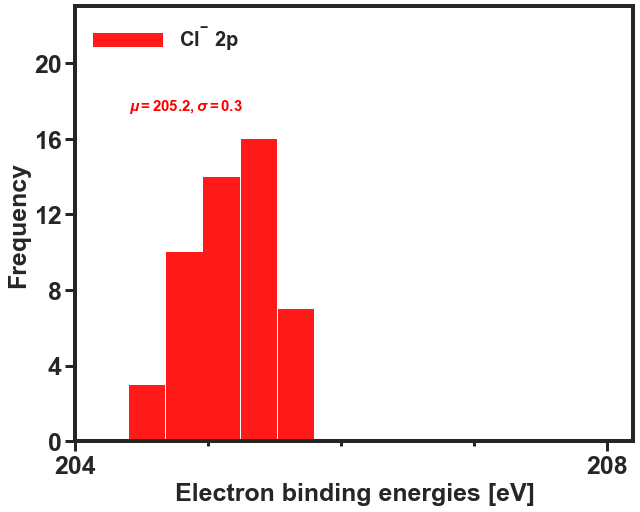

In [338]:
x_cl_acv3z_x2cmmf_gaunt_2p = df.s_chloride_2p

y_cl_acv3z_x2cmmf_gaunt_2p = [round(num, 1) for num in x_cl_acv3z_x2cmmf_gaunt_2p]

z_cl_acv3z_x2cmmf_gaunt_2p = np.array(y_cl_acv3z_x2cmmf_gaunt_2p)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_cl_acv3z_x2cmmf_gaunt_2p = count(z_cl_acv3z_x2cmmf_gaunt_2p)
print(counted_cl_acv3z_x2cmmf_gaunt_2p)



mean_z_cl_acv3z_x2cmmf_gaunt_2p = np.mean(z_cl_acv3z_x2cmmf_gaunt_2p)
print("mean_z =", mean_z_cl_acv3z_x2cmmf_gaunt_2p)


std_z_cl_acv3z_x2cmmf_gaunt_2p = np.std(z_cl_acv3z_x2cmmf_gaunt_2p)
print("std_z =", std_z_cl_acv3z_x2cmmf_gaunt_2p)



plt.figure(figsize=(10,8))

kwargs = dict(alpha=0.9, bins=5)

dk_cl_acv3z_x2cmmf_gaunt_2p = list(dict.keys(counted_cl_acv3z_x2cmmf_gaunt_2p))
dv_cl_acv3z_x2cmmf_gaunt_2p = list(dict.values(counted_cl_acv3z_x2cmmf_gaunt_2p))


dkmin_z_cl_acv3z_x2cmmf_gaunt_2p = min(dk_cl_acv3z_x2cmmf_gaunt_2p)
dkmax_z_cl_acv3z_x2cmmf_gaunt_2p = max(dk_cl_acv3z_x2cmmf_gaunt_2p)



dvmin_z_cl_acv3z_x2cmmf_gaunt_2p = min(dv_cl_acv3z_x2cmmf_gaunt_2p)
dvmax_z_cl_acv3z_x2cmmf_gaunt_2p = max(dv_cl_acv3z_x2cmmf_gaunt_2p)



plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
#plt.yticks(np.arange(0, 20, 2))
#plt.xticks(np.arange(204.4, 206.2, 1))

plt.axis([204, 208.2, 0, 23])
plt.yticks(np.arange(0, 23, 4))
plt.xticks(np.arange(204, 208.2, 4))


plt.hist(z_cl_acv3z_x2cmmf_gaunt_2p, **kwargs, color='red', rwidth=0.98, label='Cl$^{-}$ 2p', linewidth=0.2)
#sns.distplot(z_cl_acv3z_x2cmmf_gaunt_2p , color='red', hist=False, kde_kws = {'color':'red', 
#                      'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.figtext(0.2, 0.7, "$\mu=205.2, \sigma=0.3$", fontsize=15, color="red")
#plt.savefig('solvate_cl_acv3z_x2cmmf_gaunt_2p.png', bbox_inches='tight', dpi=400)

plt.show()


{203.9: 3, 204.5: 9, 204.0: 5, 204.3: 5, 204.2: 4, 204.6: 5, 204.1: 3, 204.4: 4, 203.6: 1, 204.9: 4, 204.8: 2, 203.7: 1, 203.8: 1, 204.7: 2, 205.0: 1}
mean = 204.362
std = 0.3345982665824804
{205.6: 6, 205.5: 1, 206.2: 9, 205.9: 6, 205.8: 4, 205.7: 2, 206.1: 5, 205.2: 1, 206.5: 3, 206.0: 4, 206.4: 2, 206.3: 3, 206.6: 2, 205.4: 2}
mean = 205.996
std = 0.32982419559516823


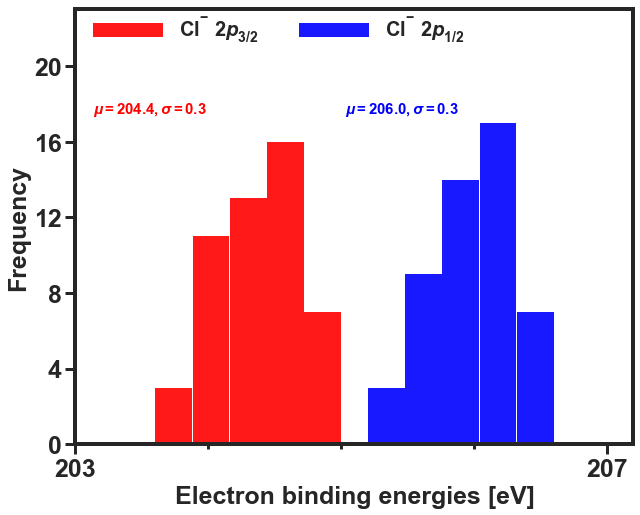

In [339]:
x_cl_acv3z_x2cmmf_gaunt_2p32 = df.s_chloride_2p32
x_cl_acv3z_x2cmmf_gaunt_2p12 = df.s_chloride_2p12



y_cl_acv3z_x2cmmf_gaunt_2p32 = [round(num, 1) for num in x_cl_acv3z_x2cmmf_gaunt_2p32]

z_cl_acv3z_x2cmmf_gaunt_2p32 = np.array(y_cl_acv3z_x2cmmf_gaunt_2p32)



y_cl_acv3z_x2cmmf_gaunt_2p12 = [round(num, 1) for num in x_cl_acv3z_x2cmmf_gaunt_2p12]

z_cl_acv3z_x2cmmf_gaunt_2p12 = np.array(y_cl_acv3z_x2cmmf_gaunt_2p12)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_cl_acv3z_x2cmmf_gaunt_2p32 = count(z_cl_acv3z_x2cmmf_gaunt_2p32)
print(counted_cl_acv3z_x2cmmf_gaunt_2p32)

mean_z_cl_acv3z_x2cmmf_gaunt_2p32 = np.mean(z_cl_acv3z_x2cmmf_gaunt_2p32)
print("mean =", mean_z_cl_acv3z_x2cmmf_gaunt_2p32)


std_z_cl_acv3z_x2cmmf_gaunt_2p32 = np.std(z_cl_acv3z_x2cmmf_gaunt_2p32)
print("std =", std_z_cl_acv3z_x2cmmf_gaunt_2p32)


def count(list_z1) -> dict:
    hist = {}
    for i in list_z1:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_cl_acv3z_x2cmmf_gaunt_2p12 = count(z_cl_acv3z_x2cmmf_gaunt_2p12)
print(counted_cl_acv3z_x2cmmf_gaunt_2p12)


mean_z_cl_acv3z_x2cmmf_gaunt_2p12 = np.mean(z_cl_acv3z_x2cmmf_gaunt_2p12)
print("mean =", mean_z_cl_acv3z_x2cmmf_gaunt_2p12)


std_z_cl_acv3z_x2cmmf_gaunt_2p12 = np.std(z_cl_acv3z_x2cmmf_gaunt_2p12)
print("std =", std_z_cl_acv3z_x2cmmf_gaunt_2p12)



plt.figure(figsize=(10,8))

kwargs = dict(alpha=0.9, bins=5, linewidth=0.2)

dk_cl_acv3z_x2cmmf_gaunt_2p32 = list(dict.keys(counted_cl_acv3z_x2cmmf_gaunt_2p32))
dv_cl_acv3z_x2cmmf_gaunt_2p32 = list(dict.values(counted_cl_acv3z_x2cmmf_gaunt_2p32))


dk_cl_acv3z_x2cmmf_gaunt_2p12 = list(dict.keys(counted_cl_acv3z_x2cmmf_gaunt_2p12))
dv_cl_acv3z_x2cmmf_gaunt_2p12 = list(dict.values(counted_cl_acv3z_x2cmmf_gaunt_2p12))



dkmin_z_cl_acv3z_x2cmmf_gaunt_2p32 = min(dk_cl_acv3z_x2cmmf_gaunt_2p32)
dkmax_z_cl_acv3z_x2cmmf_gaunt_2p32 = max(dk_cl_acv3z_x2cmmf_gaunt_2p32)
dvmin_z_cl_acv3z_x2cmmf_gaunt_2p32 = min(dv_cl_acv3z_x2cmmf_gaunt_2p32)
dvmax_z_cl_acv3z_x2cmmf_gaunt_2p32 = max(dv_cl_acv3z_x2cmmf_gaunt_2p32)

dkmin_z_cl_acv3z_x2cmmf_gaunt_2p12 = min(dk_cl_acv3z_x2cmmf_gaunt_2p12)
dkmax_z_cl_acv3z_x2cmmf_gaunt_2p12 = max(dk_cl_acv3z_x2cmmf_gaunt_2p12)
dvmin_z_cl_acv3z_x2cmmf_gaunt_2p12 = min(dv_cl_acv3z_x2cmmf_gaunt_2p12)
dvmax_z_cl_acv3z_x2cmmf_gaunt_2p12 = max(dv_cl_acv3z_x2cmmf_gaunt_2p12)




plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)



plt.axis([203, 207.2, 0, 23])
plt.yticks(np.arange(0, 23, 4))
plt.xticks(np.arange(203, 207.2, 4))



plt.hist(z_cl_acv3z_x2cmmf_gaunt_2p32, **kwargs, color='red', rwidth=0.99, label='Cl$^{-}$ 2$p_{3/2}$')
plt.hist(z_cl_acv3z_x2cmmf_gaunt_2p12, **kwargs, color='blue', rwidth=0.99, label='Cl$^{-}$ 2$p_{1/2}$')
#sns.distplot(z_cl_acv3z_x2cmmf_gaunt_2p32 , color='green', hist=False, kde_kws = {'color':'green', 
#                      'linewidth':5, 'linestyle':'--', 'alpha':0.9})
#sns.distplot(z_cl_acv3z_x2cmmf_gaunt_2p12, color='gold', hist=False, kde_kws = {'color':'gold', 
#                       'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5, ncol=2, bbox_to_anchor=(0,1.03))
plt.figtext(0.15, 0.7, "$\mu=204.4, \sigma=0.3$", fontsize=15, color="red")
plt.figtext(0.5, 0.7, "$\mu=206.0, \sigma=0.3$", fontsize=15, color="blue")
#plt.savefig('solvate_cl_acv3z_x2cmmf_gaunt_2p1232.png', bbox_inches='tight', dpi=400)

plt.show()



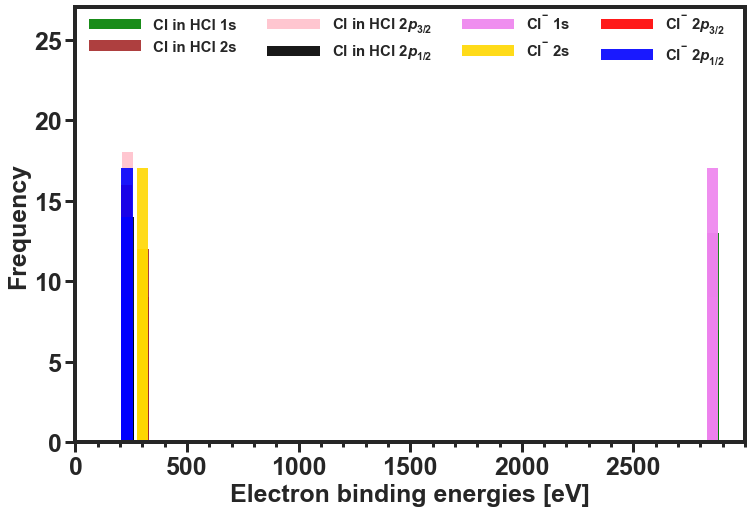

In [340]:

fig, ax = plt.subplots(figsize=(12,8))



#kwargs = dict(alpha=0.9, bins=5)


ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)
#ax.set_xscale('log')


plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
plt.axis([0, 3000, 0, 27])
plt.yticks(np.arange(0, 27, 5))
plt.xticks(np.arange(0, 3000, 500))


plt.hist(z_hcl_acv3z_x2cmmf_gaunt_1s, **kwargs, color='green', rwidth=0.98, label='Cl in HCl 1s', width=50)#, linewidth=15)
plt.hist(z_hcl_acv3z_x2cmmf_gaunt_2s, **kwargs, color='brown', rwidth=0.98, label='Cl in HCl 2s', width=50)#, linewidth=15)
plt.hist(z_hcl_acv3z_x2cmmf_gaunt_2p32, **kwargs, color='pink', rwidth=0.98, label='Cl in HCl 2$p_{3/2}$', width=50)#, linewidth=15)
plt.hist(z_hcl_acv3z_x2cmmf_gaunt_2p12, **kwargs, color='black', rwidth=0.98, label='Cl in HCl 2$p_{1/2}$', width=50)#, linewidth=15)


plt.hist(z_cl_acv3z_x2cmmf_gaunt_1s, **kwargs, color='violet', rwidth=0.98, label='Cl$^{-}$ 1s', width=50)#, linewidth=0.1)
plt.hist(z_cl_acv3z_x2cmmf_gaunt_2s, **kwargs, color='gold', rwidth=0.98, label='Cl$^{-}$ 2s', width=50)#, linewidth=0.1)
plt.hist(z_cl_acv3z_x2cmmf_gaunt_2p32, **kwargs, color='red', rwidth=0.98, label='Cl$^{-}$ 2$p_{3/2}$', width=50)
plt.hist(z_cl_acv3z_x2cmmf_gaunt_2p12, **kwargs, color='blue', rwidth=0.98, label='Cl$^{-}$ 2$p_{1/2}$', width=50)
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 15}, handlelength=3.5, ncol=4, bbox_to_anchor=(0,1.02))
#plt.figtext(0.15, 0.7, "$\mu=204.4, \sigma=0.3$", fontsize=15, color="red")
#plt.figtext(0.5, 0.7, "$\mu=206.0, \sigma=0.3$", fontsize=15, color="blue")
#plt.savefig('solvate_shift.png', bbox_inches='tight', dpi=400)

plt.show()